# 1. 전처리 및 EDA

#### stoxkX 데이터 칼럼 분석

In [27]:
import pandas as pd
from statistics import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.patches as mpatch
import matplotlib.dates as mdate
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [28]:
# csv파일 불러오기

In [29]:
df1 = pd.read_csv('./stock_x.csv')
df1["Sneaker Name"] = df1["Sneaker Name"].str.lower()

In [30]:
# 데이터 프레임 생성 및 칼럼명 변경

In [31]:
df1["Sale Price"] = df1["Sale Price"].str.replace("$","").str.replace(",","").astype("float")
df1["Retail Price"] = df1["Retail Price"].str.replace("$","").astype("int")
df1["Order Date"] = pd.to_datetime(df1["Order Date"])
df1["Release Date"] = pd.to_datetime(df1["Release Date"])

In [32]:
# 데이터 타입 확인
df1.dtypes

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price             float64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object

In [33]:
df1.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,adidas-yeezy-boost-350-v2-core-black-red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [34]:
# 데이터셋 측정
df1.shape

(99956, 8)

In [35]:
# 결측치 확인1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  int64         
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 6.1+ MB


In [36]:
#결측치 확인 2
df1.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

In [37]:
# 공백 제거 : Brand, Sneaker Name ,Buyer Region 
df1.iloc[:,[1,2,7]] = df1.iloc[:,[1,2,7]].applymap(lambda x: x.strip())

In [38]:
# 공백제거 확인
df1.Brand =="Yeezy"

0        True
1        True
2        True
3        True
4        True
         ... 
99951    True
99952    True
99953    True
99954    True
99955    True
Name: Brand, Length: 99956, dtype: bool

In [39]:
# 판매 가격의 평균, 중앙값, 표준편차 보기 : basicstats_saleprice 
#평균 : 446, 중앙값 : 370, 표준편차 255.9
basicstats_saleprice = {}
basicstats_saleprice["Mean"] = mean(df1["Sale Price"])
basicstats_saleprice["Median"] = median(df1["Sale Price"])
basicstats_saleprice["Standard Deviation"] = stdev(df1["Sale Price"])
basicstats_saleprice

{'Mean': 446.63471927648163,
 'Median': 370.0,
 'Standard Deviation': 255.98296885702655}

Text(0.5, 1.0, 'Histogram Sale Price')

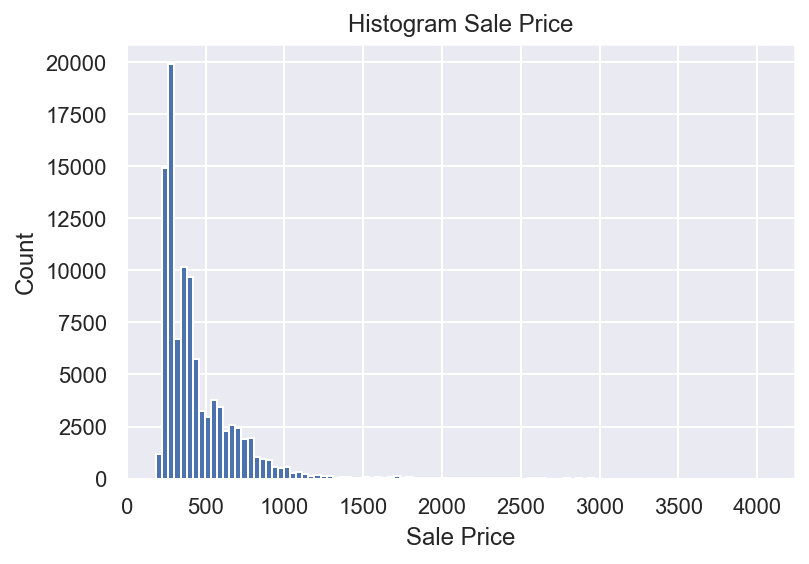

In [40]:
# 판매가격의 분포 : 아래 표를 보면 판매가격이 한쪽으로 치우친걸 확인
plt.hist(x=df1["Sale Price"], bins=100)  #100개로로 쪼개서 확인

plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Histogram Sale Price")


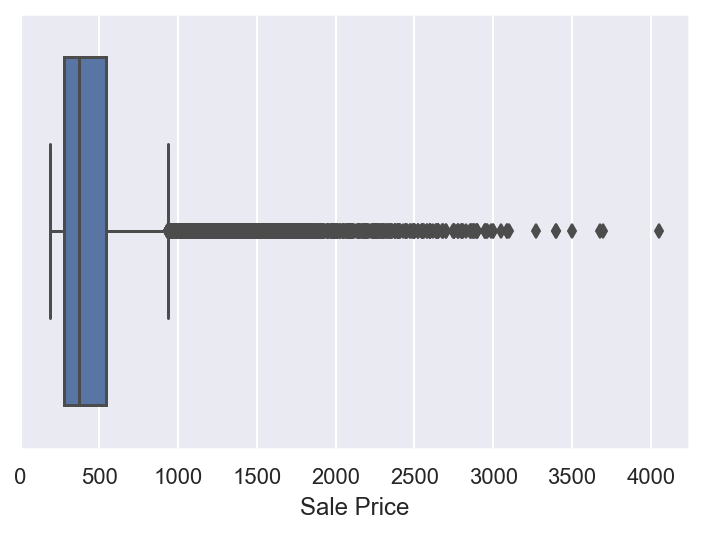

In [41]:
# 박스플롯에서 높은 이상치들이 많이 있는것을 확인
#  whis=1.5 기본값으로 설정되있어 iqr * 1.5로 설정해서 값을 구한것
sns.boxplot(x = "Sale Price", data= df1);

In [42]:
# yeezy 의 경우 220또는 200의 가격으로 판매됨
df1.loc[df1.Brand == "Yeezy"]["Retail Price"].unique()

array([220, 200])

In [43]:
# off white 의 경우  :160, 250, 190, 130, 170, 150, 200 이지 보다 다양함
df1.loc[df1.Brand == "Off-White"]["Retail Price"].unique()

array([160, 250, 190, 130, 170, 150, 200])

In [44]:
df1.Brand.unique()

array(['Yeezy', 'Off-White'], dtype=object)

In [45]:
# Retail price 의 평균, 중앙값, 표준편차 확인 : basicstats_retailprirce
#평균 208.6, 중앙값 : 220, 표준편차 25
basicstats_retailprirce = {}
basicstats_retailprirce["Mean"] = mean(df1["Retail Price"])
basicstats_retailprirce["Median"] = median(df1["Retail Price"])
basicstats_retailprirce["Standard Deviation"] = stdev(df1["Retail Price"])
basicstats_retailprirce

{'Mean': 208.613589979591,
 'Median': 220.0,
 'Standard Deviation': 25.200009547820848}

In [46]:
# 신발 사이즈 확인
df1["Shoe Size"].unique()

array([11. , 11.5,  8.5, 10. ,  9. , 14. ,  8. ,  5.5,  9.5, 10.5, 13. ,
       12. ,  5. ,  6.5,  6. ,  7.5, 12.5,  4. ,  7. , 13.5, 16. , 17. ,
       14.5,  4.5, 15. ,  3.5])

In [47]:
# 신발 사이즈 평균, 중앙값, 표준편차, 최빈값 확인 : basicstats_shoesize
# 평균 9.3, 중앙값, 9.5, 표준편차 2.32, 최빈값 : 10
basicstats_shoesize = {}
basicstats_shoesize["Mean"] = mean(df1["Shoe Size"])
basicstats_shoesize["Median"] = median(df1["Shoe Size"])
basicstats_shoesize["Standard Deviation"] = stdev(df1["Shoe Size"])
basicstats_shoesize["Mode"] = mode(df1["Shoe Size"])
basicstats_shoesize

{'Mean': 9.344181439833527,
 'Median': 9.5,
 'Standard Deviation': 2.329587602888945,
 'Mode': 10.0}

In [48]:
# 리턴 카운츠로 사이즈별 갯수 확인
np.unique(df1["Shoe Size"], return_counts=True)

(array([ 3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,
         9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. ,
        14.5, 15. , 16. , 17. ]),
 array([    4,  2241,  1304,  3577,  2621,  4013,  2219,  3867,  2664,
         5363,  5300,  9706,  8685, 11093,  8784,  9251,  4502,  7297,
          628,  4602,   147,  1791,    84,   130,    79,     4]))

In [49]:
# 신발 사이즈 분포도
#(3.5 - 17)*2

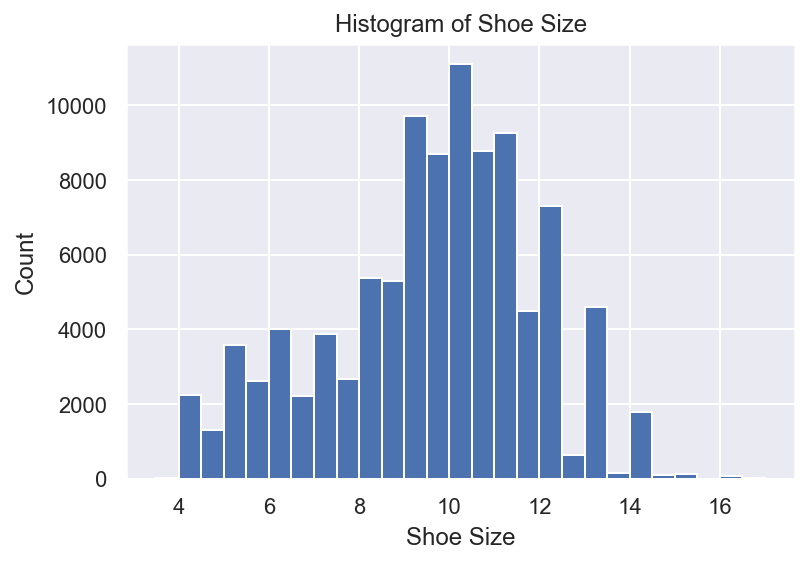

In [50]:
# 신발 사이즈 분포도 확인 리턴카운츠로 확인한것과 동일
plt.hist(x=df1["Shoe Size"], bins=27);

plt.xlabel("Shoe Size")
plt.ylabel("Count")
plt.title("Histogram of Shoe Size");

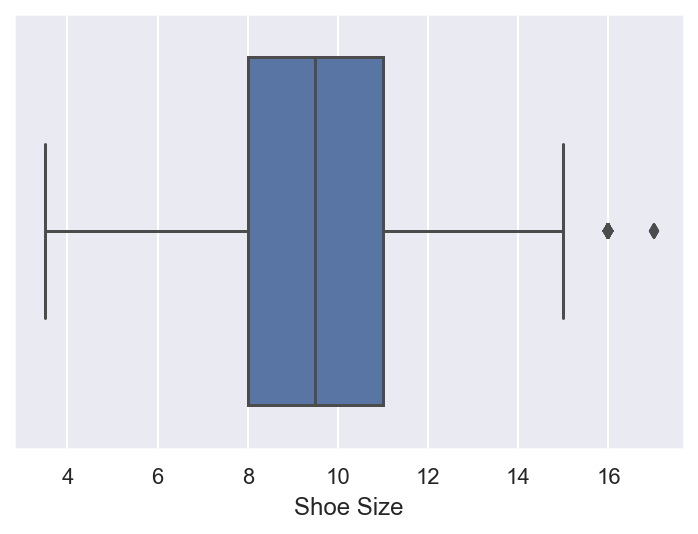

In [51]:
# 박스플롯에서 신발사이즈 이상치 확인
# 이상치 거의 없는것 확인
sns.boxplot(x = "Shoe Size", data= df1);

In [52]:
# 브랜드 갯수
# 이지 :72162
# 오프화이트 : 27794
df1["Brand"].value_counts()

Yeezy        72162
Off-White    27794
Name: Brand, dtype: int64

In [53]:
# 가장 많이 주문되는 운동화 이름
# 아래와 같음
df1["Sneaker Name"].value_counts().to_frame()[:5]


,Sneaker Name
adidas-yeezy-boost-350-v2-butter,11423
adidas-yeezy-boost-350-v2-beluga-2pt0,10395
adidas-yeezy-boost-350-v2-zebra,10110
adidas-yeezy-boost-350-v2-blue-tint,9297
adidas-yeezy-boost-350-v2-cream-white,9097


In [54]:
# 구매자의 지역 분포 확인
# 캘리포티아 뉴욕이 대부분
df1["Buyer Region"].value_counts().to_frame()[:5]

,Buyer Region
California,19349
New York,16525
Oregon,7681
Florida,6376
Texas,5876


In [55]:
# 총합
df1["Buyer Region"].value_counts().sum()

99956

In [56]:
# 구매자 지역 분포도 탑 10 퍼센테이지
(df1["Buyer Region"].value_counts()/df1["Buyer Region"].value_counts().sum() *100)[:10]

California       19.357517
New York         16.532274
Oregon            7.684381
Florida           6.378807
Texas             5.878587
New Jersey        4.722078
Illinois          3.783665
Pennsylvania      3.110369
Massachusetts     2.904278
Michigan          2.763216
Name: Buyer Region, dtype: float64

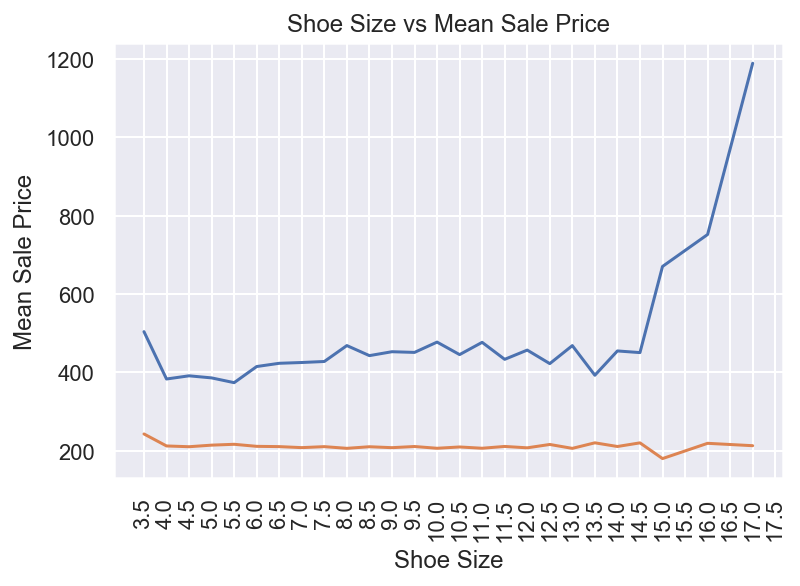

In [57]:
# 신발 사이즈 별 평균 판매가격 및 평균 소매가격 그래프
# 판매가와 리셀가 크기가 4에서 14.5까지는 일관적으로 유지됨
# 15부터 올라가는데 상대적으로 적은 수의 관측치로 인해 발생할 가능성이 있음
fig = plt.plot(df1.groupby('Shoe Size')['Sale Price'].mean())
plt.plot(df1.groupby('Shoe Size')['Retail Price'].mean())

plt.xlabel("Shoe Size")
plt.ylabel("Mean Sale Price")
plt.title("Shoe Size vs Mean Sale Price")

plt.xticks(np.arange(min(df1["Shoe Size"]), max(df1["Shoe Size"])+1, 0.5), rotation = 90);

In [58]:
# 시간에 따른 평균 및 중간 리셀 가격
# 리셀가격은 데이터 기간이 지나면서 하락하는 것으로 보인다.
# 2018년 6월 판매가격 급등

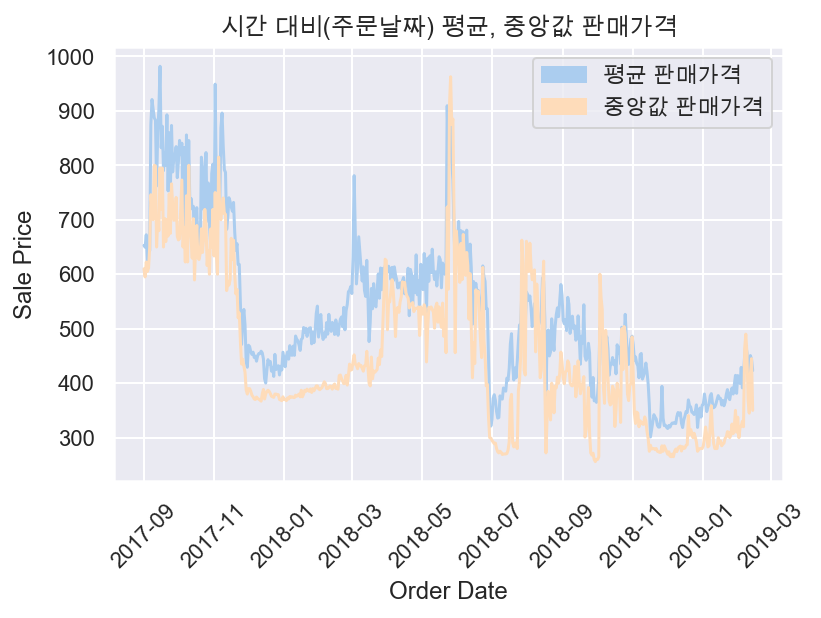

In [59]:
# 주문 날짜 대비 평균 판매가격 표
fig = plt.plot(df1.groupby("Order Date")["Sale Price"].mean(), color="#ABCDEF", alpha = 1)
plt.plot(df1.groupby("Order Date")["Sale Price"].median(), color="#FEDCBA", alpha = 1)

plt.xlabel("Order Date")
plt.ylabel("Sale Price")
plt.title("시간 대비(주문날짜) 평균, 중앙값 판매가격")

blue_patch, orange_patch = mpatch.Patch(label = "평균 판매가격", color="#ABCDEF"),\
mpatch.Patch(label = "중앙값 판매가격", color="#FEDCBA")

plt.legend(handles = [blue_patch, orange_patch])

plt.tick_params(axis='x',labelbottom = True)
plt.xticks(rotation = 45)
plt.rcParams["grid.alpha"] = 0.1
plt.grid(True)

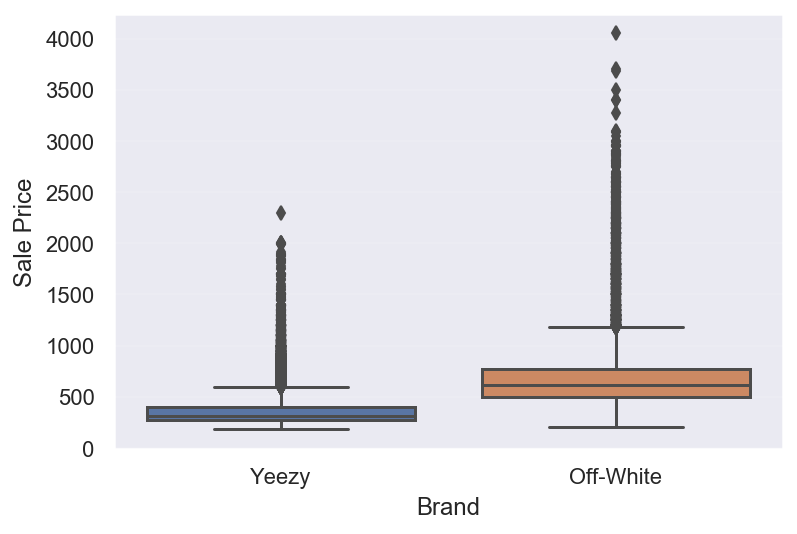

In [60]:
# 오프화이트와 이지의 박스플랏 비교
# 오프화이트가 더 높은 중앙값과 큰 범위를 가지고 있다
#이상치도 더 높음
sns.boxplot(x = "Brand", y = "Sale Price", data=df1);

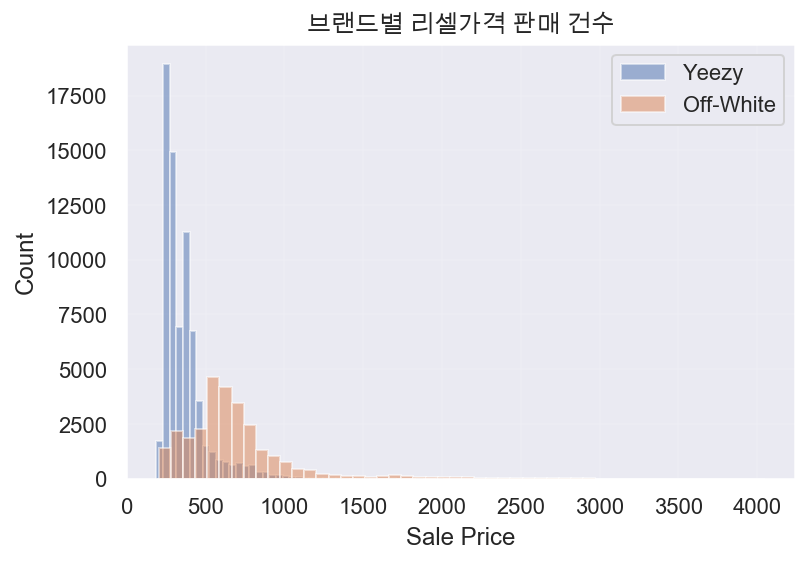

In [61]:
# 브랜드 별 판매 가격이 중첩된 히스토 그램 : bins = 50
bins = 50
plt.hist(df1.loc[df1["Brand"] == "Yeezy", "Sale Price"], bins, alpha=0.5, label="Yeezy")
plt.hist(df1.loc[df1["Brand"] == "Off-White", "Sale Price"], bins, alpha=0.5, label="Off-White")

plt.legend()

plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("브랜드별 리셀가격 판매 건수")
plt.show()

In [62]:
# 주별 평균 판매가격
df1.groupby("Buyer Region", as_index=False)["Sale Price"].mean()[:5]

,Buyer Region,Sale Price
0,Alabama,395.857768
1,Alaska,435.409836
2,Arizona,449.074392
3,Arkansas,407.861272
4,California,478.248178


In [63]:
# 주별 평균 판매가격 순위
df1.groupby("Buyer Region", as_index=False)["Sale Price"].mean()\
.sort_values(by="Sale Price", ascending=False)[:5]

,Buyer Region,Sale Price
7,Delaware,503.335749
11,Hawaii,488.966057
28,Nevada,485.824051
4,California,478.248178
37,Oregon,469.550970


In [64]:
# date_diff : 주문 날짜와 출시 날짜의 차이 추가
df1["date_diff"] = df1["Order Date"].sub(df1["Release Date"], axis=0)/np.timedelta64('1', 'D')
df1["date_diff"][:5]

0    342.0
1    282.0
2    282.0
3    282.0
4    202.0
Name: date_diff, dtype: float64

In [65]:
# price_ratio : 판매가격 대비 리셀가격 비율
df1["price_ratio"] = df1["Sale Price"]/df1["Retail Price"]
df1["price_ratio"][:5]

0    4.986364
1    3.113636
2    3.136364
3    4.886364
4    3.763636
Name: price_ratio, dtype: float64

In [66]:
# 운동화 이름 및 갯수 확인
np.unique(df1["Sneaker Name"], return_counts=True)

(array(['adidas-yeezy-boost-350-low-moonrock',
        'adidas-yeezy-boost-350-low-oxford-tan',
        'adidas-yeezy-boost-350-low-pirate-black-2015',
        'adidas-yeezy-boost-350-low-pirate-black-2016',
        'adidas-yeezy-boost-350-low-turtledove',
        'adidas-yeezy-boost-350-low-v2-beluga',
        'adidas-yeezy-boost-350-v2-beluga-2pt0',
        'adidas-yeezy-boost-350-v2-blue-tint',
        'adidas-yeezy-boost-350-v2-butter',
        'adidas-yeezy-boost-350-v2-core-black-copper',
        'adidas-yeezy-boost-350-v2-core-black-green',
        'adidas-yeezy-boost-350-v2-core-black-red',
        'adidas-yeezy-boost-350-v2-core-black-red-2017',
        'adidas-yeezy-boost-350-v2-core-black-white',
        'adidas-yeezy-boost-350-v2-cream-white',
        'adidas-yeezy-boost-350-v2-semi-frozen-yellow',
        'adidas-yeezy-boost-350-v2-sesame',
        'adidas-yeezy-boost-350-v2-static',
        'adidas-yeezy-boost-350-v2-static-reflective',
        'adidas-yeezy-boost-350-v2-

In [67]:
# 브랜드 파생 변수 만들기
# 조던, v2, 에어맥스 90, 에어맥스97, zoom(나이키),airporce, presto,airforce, blazer, vapormax
design = ["jordan","v2","90","97","zoom","presto",'force',"blazer","vapormax"]

for i in range(len(design)):
    df1[design[i]] = df1["Sneaker Name"].apply(lambda x : 1 if design[i] in x.split("-") else 0 ) 
    print(np.unique(df1[design[i]], return_counts=True))

(array([0, 1]), array([94253,  5703]))
(array([0, 1]), array([28249, 71707]))
(array([0, 1]), array([97958,  1998]))
(array([0, 1]), array([98564,  1392]))
(array([0, 1]), array([95639,  4317]))
(array([0, 1]), array([95593,  4363]))
(array([0, 1]), array([97470,  2486]))
(array([0, 1]), array([96334,  3622]))
(array([0, 1]), array([96527,  3429]))


In [68]:
# 컬럼명 변경
df1.rename(columns = {"90":"airmax90","97":"airmax97",'force':"airforce"}, inplace = True)

In [69]:
# buyer region 파생 변수 추가전 확인
df1["Buyer Region"].unique()

array(['California', 'Kentucky', 'Rhode Island', 'Michigan', 'New York',
       'Kansas', 'Florida', 'New Jersey', 'Texas', 'North Carolina',
       'Oregon', 'Alabama', 'Delaware', 'Virginia', 'Wisconsin',
       'Colorado', 'Massachusetts', 'Pennsylvania', 'Louisiana',
       'Washington', 'Georgia', 'Ohio', 'Nebraska', 'Oklahoma',
       'Connecticut', 'Missouri', 'South Carolina', 'Maine', 'Illinois',
       'Nevada', 'Maryland', 'Arizona', 'Minnesota', 'Iowa', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Alaska', 'Wyoming',
       'Utah', 'New Hampshire', 'Vermont', 'District of Columbia',
       'Hawaii', 'New Mexico', 'South Dakota', 'Mississippi',
       'North Dakota', 'Idaho', 'Montana'], dtype=object)

In [70]:
# 구매자 지역 분포도 탑 10 퍼센테이지
(df1["Buyer Region"].value_counts()/df1["Buyer Region"].value_counts().sum() *100)[:10]

California       19.357517
New York         16.532274
Oregon            7.684381
Florida           6.378807
Texas             5.878587
New Jersey        4.722078
Illinois          3.783665
Pennsylvania      3.110369
Massachusetts     2.904278
Michigan          2.763216
Name: Buyer Region, dtype: float64

In [71]:
# 구매자 지역 분포도 탑 5는 전체 구매량의 55% 차지
# get_dummies 로 다 넣는것은 효율이 떨어지므로 이에대한 변수만 추가
(df1["Buyer Region"].value_counts()/df1["Buyer Region"].value_counts().sum() *100)[:5].sum()

55.831565888991165

In [72]:
# 베스트 5 주 변수 추가
best5_states = ["California", "New York", "Oregon", "Florida", "Texas"]

for i in range(len(best5_states)):
    df1[best5_states[i]] = df1["Buyer Region"].apply(lambda x : 1 if best5_states[i] in x else 0 ) 
    print(np.unique(df1[best5_states[i]], return_counts=True))

(array([0, 1]), array([80607, 19349]))
(array([0, 1]), array([83431, 16525]))
(array([0, 1]), array([92275,  7681]))
(array([0, 1]), array([93580,  6376]))
(array([0, 1]), array([94080,  5876]))


In [73]:
# 그외 주 변수 추가
df1["other_state"] = pd.Series(list(map(int,~df1["Buyer Region"].isin(best5_states))))

In [74]:
# 그 외주 변수 확인( 값이 0인 것들의 유니크 값 확인: 베스트 5주 출력됨)
df1.loc[df1["other_state"] == 0]["Buyer Region"].unique()

array(['California', 'New York', 'Florida', 'Texas', 'Oregon'],
      dtype=object)

In [75]:
# brand2 : 이지 와 오프화이트 브랜드 구분하는 파생 변수 추가
# 이지 == 1, 오프화이트 == 0
df1["brand2"] = df1["Brand"].apply(lambda x : 1 if 'Yeezy' in x else 0)

In [76]:
# 색깔 변수 1개 추가 블랙만
df1["blackcol"] = df1['Sneaker Name'].apply(lambda x : 1 if 'black' in x.split("-") else 0)

In [77]:
# order date 요일 변수 추가
#{0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일}

df1["day"] = 0 
for i in range(len(df1)):
    df1["day"][i] = df1["Order Date"][i].weekday()

/Users/jeongseong-yong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
df1.tail()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,date_diff,price_ratio,...,vapormax,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day
99951,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,565.0,220,2018-12-26,8.0,Oregon,49.0,2.568182,...,0,0,0,1,0,0,0,1,0,2
99952,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,598.0,220,2018-12-26,8.5,California,49.0,2.718182,...,0,1,0,0,0,0,0,1,0,2
99953,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,605.0,220,2018-12-26,5.5,New York,49.0,2.750000,...,0,0,1,0,0,0,0,1,0,2
99954,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,650.0,220,2018-12-26,11.0,California,49.0,2.954545,...,0,1,0,0,0,0,0,1,0,2
99955,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,640.0,220,2018-12-26,11.5,Texas,49.0,2.909091,...,0,0,0,0,0,1,0,1,0,2


In [79]:
df1.day.value_counts()

4    17309
2    15424
3    14997
5    14005
0    13734
1    13391
6    11096
Name: day, dtype: int64

In [80]:
# order date 의 US holiday 변수 추가
# {0,1}
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

holidays = cal.holidays(start=df1['Order Date'].min(),
                        end=df1['Order Date'].max()).to_pydatetime()
df1['holiday'] = df1['Order Date'].isin(holidays)
df1["holiday"] = pd.Series(list(map(int, df1["holiday"])))

In [81]:
# 추가된 컬럼 확인
df1.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'date_diff', 'price_ratio',
       'jordan', 'v2', 'airmax90', 'airmax97', 'zoom', 'presto', 'airforce',
       'blazer', 'vapormax', 'California', 'New York', 'Oregon', 'Florida',
       'Texas', 'other_state', 'brand2', 'blackcol', 'day', 'holiday'],
      dtype='object')

In [82]:
# 총 컬럼 29개
df1.tail()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,date_diff,price_ratio,...,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day,holiday
99951,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,565.0,220,2018-12-26,8.0,Oregon,49.0,2.568182,...,0,0,1,0,0,0,1,0,2,0
99952,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,598.0,220,2018-12-26,8.5,California,49.0,2.718182,...,1,0,0,0,0,0,1,0,2,0
99953,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,605.0,220,2018-12-26,5.5,New York,49.0,2.750000,...,0,1,0,0,0,0,1,0,2,0
99954,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,650.0,220,2018-12-26,11.0,California,49.0,2.954545,...,1,0,0,0,0,0,1,0,2,0
99955,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,640.0,220,2018-12-26,11.5,Texas,49.0,2.909091,...,0,0,0,0,1,0,1,0,2,0


In [83]:
# priceratio  의 평균, 중앙값, 표준편차 확인 : basicstats_priceratio
#평균 2.24, 중앙값 : 1.7, 표준편차 1.5
# 평균 판매가격이 정상가의 2.25배

basicstats_priceratio = {}

basicstats_priceratio["Mean"] = mean(df1["price_ratio"])
basicstats_priceratio["Median"] = median(df1["price_ratio"])
basicstats_priceratio["Standard Deviation"] = stdev(df1["price_ratio"])

basicstats_priceratio

{'Mean': 2.2482447702395354,
 'Median': 1.7045454545454546,
 'Standard Deviation': 1.5085629071083253}

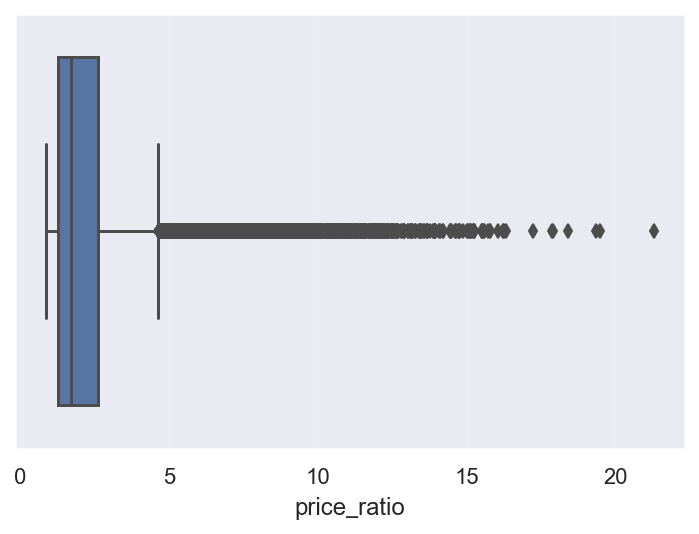

In [84]:
#price_ratio의 박스플랏 
sns.boxplot(x=df1["price_ratio"]);

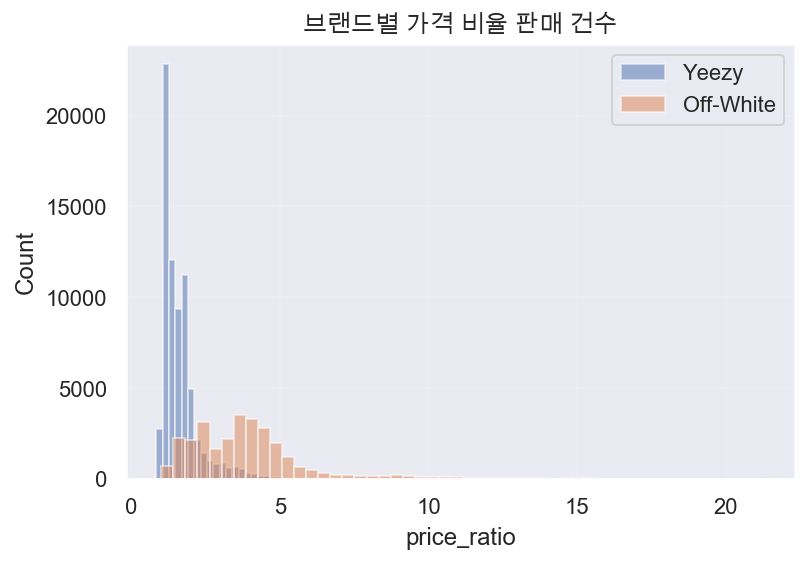

In [85]:
#브랜드별 pirce_ratio 가 중첩된 히스토그랩 : bins = 50
bins = 50
plt.hist(df1.loc[df1["Brand"] == "Yeezy","price_ratio"], bins, alpha=0.5, label='Yeezy')
plt.hist(df1.loc[df1["Brand"] == "Off-White","price_ratio"], bins, alpha=0.5, label='Off-White')

plt.legend(loc='upper right')

plt.xlabel("price_ratio")
plt.ylabel("Count")
plt.title("브랜드별 가격 비율 판매 건수")

plt.show()

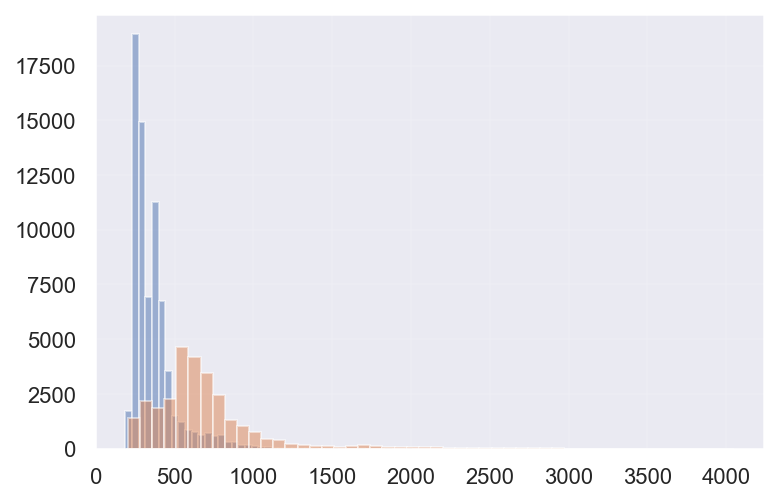

In [86]:
#위에 데이터# 브랜드 별 판매 가격이 중첩된 히스토 그램 : bins = 50
bins = 50
plt.hist(df1.loc[df1["Brand"] == "Yeezy", "Sale Price"], bins, alpha=0.5, label="Yeezy")
plt.hist(df1.loc[df1["Brand"] == "Off-White", "Sale Price"], bins, alpha=0.5, label="Off-White")

# plt.legend()

# plt.xlabel("Sale Price")
# plt.ylabel("Count")
# plt.title("브랜드별 리셀가격 판매 건수")
plt.show()

In [87]:
# 그룹바이를 사용하여 구매지역별 판매가격 비율 평균 순위
df1.groupby("Buyer Region", as_index=False)["price_ratio"].mean().sort_values("price_ratio", ascending=False)[:5]

,Buyer Region,price_ratio
7,Delaware,2.563943
11,Hawaii,2.504045
28,Nevada,2.473004
4,California,2.438176
37,Oregon,2.399616


In [88]:
#주문일과 출시일 차이에 대한 통계 : basicstats_datediff
# datediff 의 평균, 중앙값, 표준편차 확인 : basicstats_datediff
#평균 183일, 중앙값 : 56일, 표준편차 232일, 최소 - 69일?, 최대 1321일
basicstats_datediff = {}

basicstats_datediff["Mean"] = mean(df1["date_diff"])
basicstats_datediff["Median"] = median(df1["date_diff"])
basicstats_datediff["Standard Deviation"] = stdev(df1["date_diff"])
basicstats_datediff["Range"] = [min(df1["date_diff"]), max(df1["date_diff"])]

basicstats_datediff

{'Mean': 183.70872183760855,
 'Median': 56.0,
 'Standard Deviation': 232.3541419592979,
 'Range': [-69.0, 1321.0]}

In [89]:
# 주문일과 출시일의 최소값이 -이기에 확인해본 결과
# 선주문으로 볼수있음
# 또한 
df1.loc[df1["date_diff"] < 0,:][:5]

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,date_diff,price_ratio,...,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day,holiday
128,2017-09-07,Off-White,nike-air-max-90-off-white,1600.0,160,2017-09-09,8.0,California,-2.0,10.00000,...,1,0,0,0,0,0,0,0,3,0
129,2017-09-07,Off-White,nike-air-max-90-off-white,1090.0,160,2017-09-09,11.5,New York,-2.0,6.81250,...,0,1,0,0,0,0,0,0,3,0
130,2017-09-07,Off-White,nike-air-presto-off-white,1344.0,160,2017-09-09,10.0,New York,-2.0,8.40000,...,0,1,0,0,0,0,0,0,3,0
131,2017-09-07,Off-White,nike-air-presto-off-white,1325.0,160,2017-09-09,10.0,Massachusetts,-2.0,8.28125,...,0,0,0,0,0,1,0,0,3,0
132,2017-09-07,Off-White,nike-air-vapormax-off-white,1800.0,250,2017-09-09,12.0,Kentucky,-2.0,7.20000,...,0,0,0,0,0,1,0,0,3,0


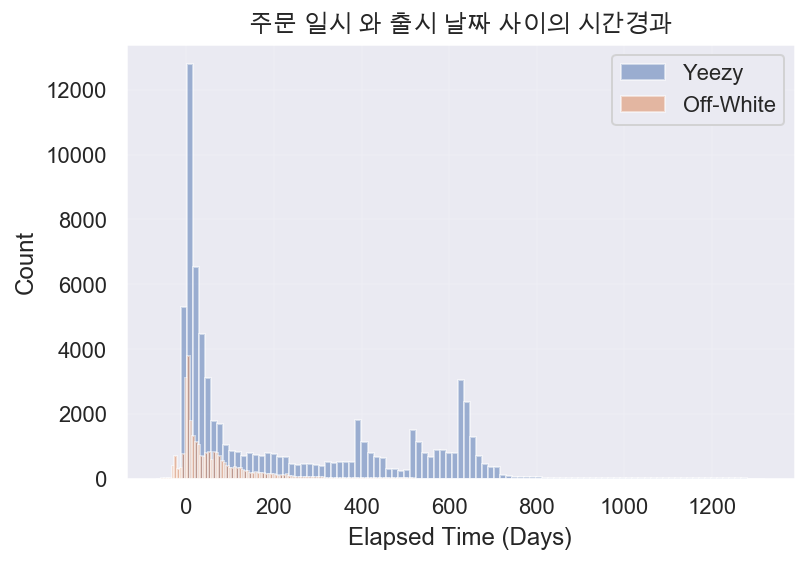

In [90]:
#브랜드별 주문된 주문 및 출시 날짜 사이의 경과시간에 대해 중첩하여 히스토 그램 작성
# yeezy 의 경우 off-white 보다 더 오랜 기간 꾸준한 수요가 있음.
bins = 100
plt.hist(df1.loc[df1["Brand"] == "Yeezy","date_diff"], bins, alpha=0.5, label='Yeezy',)
plt.hist(df1.loc[df1["Brand"] == "Off-White","date_diff"], bins, alpha=0.5, label='Off-White')

plt.legend(loc='upper right')

plt.xlabel("Elapsed Time (Days)")
plt.ylabel("Count")
plt.title("주문 일시 와 출시 날짜 사이의 시간경과")

plt.show()

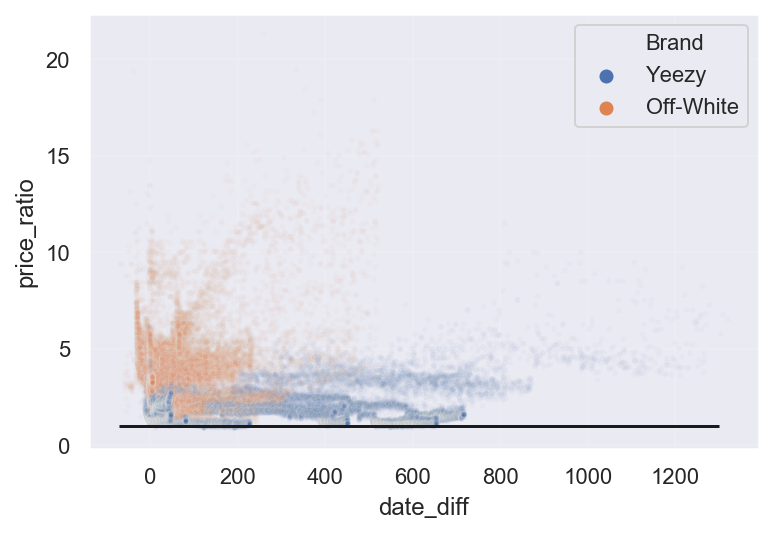

In [91]:
# 출시후 구매일 과 리셀가격 비율의 산점도 
# off-white 의 경우 단기간, 높은 가격으로 판매됨. 그러나 장기적으로 보았을 때 판매 빈도가 줄어듬 
#-> 가설1) 수량이 단기간에 빨리 소진, 가설2) 유행을 많이타서 신모델이 나왔을 때 가치 빨리 떨어짐,
#-> 가설3) 단기간엔 오프화이트가 인기가 더 많음, (가설4) 수량이 적을 것임. )-> 검증 어려움

# yeezy 의 경우, 장기간 꾸준히 팔리지만 off-white 보단 낮은 가격으로 판매됨.
# -> 가설1) 재발매될 가능성이 높음. 가설2) 유행을 많이타지 않음. 신모델이 나와도 가치 빨리 떨어지지 않음. 


fig = sns.scatterplot(x= "date_diff", y= "price_ratio", data=df1, hue= "Brand",s=8, alpha=0.03);
fig.hlines(1, -70,1300);

#### 중복 독립 변수 삭제

In [92]:
# 주문날짜, 발매날짜 드랍
df1.drop(['Order Date', 'Release Date'], axis=1, inplace=True)
df1.tail()

,Brand,Sneaker Name,Sale Price,Retail Price,Shoe Size,Buyer Region,date_diff,price_ratio,jordan,v2,...,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day,holiday
99951,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,565.0,220,8.0,Oregon,49.0,2.568182,0,1,...,0,0,1,0,0,0,1,0,2,0
99952,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,598.0,220,8.5,California,49.0,2.718182,0,1,...,1,0,0,0,0,0,1,0,2,0
99953,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,605.0,220,5.5,New York,49.0,2.750000,0,1,...,0,1,0,0,0,0,1,0,2,0
99954,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,650.0,220,11.0,California,49.0,2.954545,0,1,...,1,0,0,0,0,0,1,0,2,0
99955,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,640.0,220,11.5,Texas,49.0,2.909091,0,1,...,0,0,0,0,1,0,1,0,2,0


In [93]:
# 브랜드 이름과 , 스니커즈 네임 삭제 (오브젝트변수)
df1.drop(['Brand', 'Sneaker Name'], axis=1, inplace=True)
df1.tail()

,Sale Price,Retail Price,Shoe Size,Buyer Region,date_diff,price_ratio,jordan,v2,airmax90,airmax97,...,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day,holiday
99951,565.0,220,8.0,Oregon,49.0,2.568182,0,1,0,0,...,0,0,1,0,0,0,1,0,2,0
99952,598.0,220,8.5,California,49.0,2.718182,0,1,0,0,...,1,0,0,0,0,0,1,0,2,0
99953,605.0,220,5.5,New York,49.0,2.750000,0,1,0,0,...,0,1,0,0,0,0,1,0,2,0
99954,650.0,220,11.0,California,49.0,2.954545,0,1,0,0,...,1,0,0,0,0,0,1,0,2,0
99955,640.0,220,11.5,Texas,49.0,2.909091,0,1,0,0,...,0,0,0,0,1,0,1,0,2,0


In [94]:
# 정상 판매가격, 리셀 판매가격 변수 제거
# price_rate로 변수를 생성해 놨기 때문에
df1.drop(["Sale Price", "Retail Price"], axis=1, inplace=True)
df1.tail()

,Shoe Size,Buyer Region,date_diff,price_ratio,jordan,v2,airmax90,airmax97,zoom,presto,...,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day,holiday
99951,8.0,Oregon,49.0,2.568182,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,2,0
99952,8.5,California,49.0,2.718182,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,2,0
99953,5.5,New York,49.0,2.750000,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,2,0
99954,11.0,California,49.0,2.954545,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,2,0
99955,11.5,Texas,49.0,2.909091,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,2,0


In [95]:
# 지역 변수 위에 탑 5 컬럼 따로 생성해두어서 제거
df1.drop(['Buyer Region'], axis=1, inplace=True)
df1.tail()

,Shoe Size,date_diff,price_ratio,jordan,v2,airmax90,airmax97,zoom,presto,airforce,...,California,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,day,holiday
99951,8.0,49.0,2.568182,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,2,0
99952,8.5,49.0,2.718182,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2,0
99953,5.5,49.0,2.750000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2,0
99954,11.0,49.0,2.954545,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,2,0
99955,11.5,49.0,2.909091,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,2,0


In [96]:
#total 22 columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Shoe Size    99956 non-null  float64
 1   date_diff    99956 non-null  float64
 2   price_ratio  99956 non-null  float64
 3   jordan       99956 non-null  int64  
 4   v2           99956 non-null  int64  
 5   airmax90     99956 non-null  int64  
 6   airmax97     99956 non-null  int64  
 7   zoom         99956 non-null  int64  
 8   presto       99956 non-null  int64  
 9   airforce     99956 non-null  int64  
 10  blazer       99956 non-null  int64  
 11  vapormax     99956 non-null  int64  
 12  California   99956 non-null  int64  
 13  New York     99956 non-null  int64  
 14  Oregon       99956 non-null  int64  
 15  Florida      99956 non-null  int64  
 16  Texas        99956 non-null  int64  
 17  other_state  99956 non-null  int64  
 18  brand2       99956 non-null  int64  
 19  blac

In [97]:
df1.to_csv("final.csv")

### yeezy 데이터 변수 추가 

In [98]:
df1 = pd.read_csv('stock_x.csv')
df1["Sneaker Name"] = df1["Sneaker Name"].str.lower()
df2 = df1.loc[df1["Brand"].str.strip() == "Yeezy", :]
df2["Sale Price"] = df2["Sale Price"].str.replace("$","").str.replace(",","").astype("int")
df2["Retail Price"] = df2["Retail Price"].str.replace("$","").astype("int")
df2["Order Date"] = pd.to_datetime(df2["Order Date"])
df2["Release Date"] = pd.to_datetime(df2["Release Date"])
df2.dtypes
ddf1 = pd.read_csv("yeezy_types.csv")
ddf1.columns=['name', 'body_color', 'stripe_color', 'trim_color',
       'stripe_with_letter', 'Handle', 'color_counts', 'reflective']
ddf1["name"] = ddf1["name"].str.lower()
x_stock = pd.merge(df2, ddf1, left_on = "Sneaker Name", right_on = "name")
x_stock = x_stock.drop(labels = "name",axis=1)
x_stock

/Users/jeongseong-yong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jeongseong-yong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jeongseong-yong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,body_color,stripe_color,trim_color,stripe_with_letter,Handle,color_counts,reflective
0,2017-09-01,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,1097,220,2016-09-24,11.0,California,Grey,Orange,Grey,Y,N,3,N
1,2017-09-02,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,850,220,2016-09-24,8.0,Alabama,Grey,Orange,Grey,Y,N,3,N
2,2017-09-03,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,1068,220,2016-09-24,10.0,Kentucky,Grey,Orange,Grey,Y,N,3,N
3,2017-09-04,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,960,220,2016-09-24,9.0,California,Grey,Orange,Grey,Y,N,3,N
4,2017-09-05,Yeezy,adidas-yeezy-boost-350-low-v2-beluga,870,220,2016-09-24,6.0,New York,Grey,Orange,Grey,Y,N,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,565,220,2018-12-26,8.0,Oregon,Grey,White,White,N,Y,2,Y
72158,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,598,220,2018-12-26,8.5,California,Grey,White,White,N,Y,2,Y
72159,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,605,220,2018-12-26,5.5,New York,Grey,White,White,N,Y,2,Y
72160,2019-02-13,Yeezy,adidas-yeezy-boost-350-v2-static-reflective,650,220,2018-12-26,11.0,California,Grey,White,White,N,Y,2,Y


In [99]:
# 변수 추가전 운동화 이름 및 갯수 확인
np.unique(x_stock["Sneaker Name"], return_counts=True)

(array(['adidas-yeezy-boost-350-low-moonrock',
        'adidas-yeezy-boost-350-low-oxford-tan',
        'adidas-yeezy-boost-350-low-pirate-black-2015',
        'adidas-yeezy-boost-350-low-pirate-black-2016',
        'adidas-yeezy-boost-350-low-turtledove',
        'adidas-yeezy-boost-350-low-v2-beluga',
        'adidas-yeezy-boost-350-v2-beluga-2pt0',
        'adidas-yeezy-boost-350-v2-blue-tint',
        'adidas-yeezy-boost-350-v2-butter',
        'adidas-yeezy-boost-350-v2-core-black-copper',
        'adidas-yeezy-boost-350-v2-core-black-green',
        'adidas-yeezy-boost-350-v2-core-black-red',
        'adidas-yeezy-boost-350-v2-core-black-red-2017',
        'adidas-yeezy-boost-350-v2-core-black-white',
        'adidas-yeezy-boost-350-v2-cream-white',
        'adidas-yeezy-boost-350-v2-semi-frozen-yellow',
        'adidas-yeezy-boost-350-v2-sesame',
        'adidas-yeezy-boost-350-v2-static',
        'adidas-yeezy-boost-350-v2-static-reflective',
        'adidas-yeezy-boost-350-v2-

In [100]:
x_stock["trim_color"].unique()

array(['Grey', 'Black', 'White', 'Beige', 'Yellow', 'Blue'], dtype=object)

In [101]:
x_stock["body_color"].unique()

array(['Grey', 'Black', 'White', 'Beige', 'Yellow'], dtype=object)

In [102]:
x_stock["stripe_color"].unique()

array(['Orange', 'Beige', 'Green', 'Red', 'Black', 'White', 'Blank',
       'Yello', 'Grey'], dtype=object)

In [103]:
x_stock["Sneaker Name"].unique()

array(['adidas-yeezy-boost-350-low-v2-beluga',
       'adidas-yeezy-boost-350-v2-core-black-copper',
       'adidas-yeezy-boost-350-v2-core-black-green',
       'adidas-yeezy-boost-350-v2-core-black-red',
       'adidas-yeezy-boost-350-v2-core-black-red-2017',
       'adidas-yeezy-boost-350-v2-core-black-white',
       'adidas-yeezy-boost-350-v2-cream-white',
       'adidas-yeezy-boost-350-v2-zebra',
       'adidas-yeezy-boost-350-low-moonrock',
       'adidas-yeezy-boost-350-low-pirate-black-2016',
       'adidas-yeezy-boost-350-low-oxford-tan',
       'adidas-yeezy-boost-350-low-turtledove',
       'adidas-yeezy-boost-350-low-pirate-black-2015',
       'adidas-yeezy-boost-350-v2-semi-frozen-yellow',
       'adidas-yeezy-boost-350-v2-beluga-2pt0',
       'adidas-yeezy-boost-350-v2-blue-tint',
       'adidas-yeezy-boost-350-v2-butter',
       'adidas-yeezy-boost-350-v2-sesame',
       'adidas-yeezy-boost-350-v2-static',
       'adidas-yeezy-boost-350-v2-static-reflective'], dtype=objec

In [104]:
x_stock_1 = x_stock.drop("Sneaker Name", axis=1)

In [105]:
df1 = x_stock_1.copy()
df1

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,body_color,stripe_color,trim_color,stripe_with_letter,Handle,color_counts,reflective
0,2017-09-01,Yeezy,1097,220,2016-09-24,11.0,California,Grey,Orange,Grey,Y,N,3,N
1,2017-09-02,Yeezy,850,220,2016-09-24,8.0,Alabama,Grey,Orange,Grey,Y,N,3,N
2,2017-09-03,Yeezy,1068,220,2016-09-24,10.0,Kentucky,Grey,Orange,Grey,Y,N,3,N
3,2017-09-04,Yeezy,960,220,2016-09-24,9.0,California,Grey,Orange,Grey,Y,N,3,N
4,2017-09-05,Yeezy,870,220,2016-09-24,6.0,New York,Grey,Orange,Grey,Y,N,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,2019-02-13,Yeezy,565,220,2018-12-26,8.0,Oregon,Grey,White,White,N,Y,2,Y
72158,2019-02-13,Yeezy,598,220,2018-12-26,8.5,California,Grey,White,White,N,Y,2,Y
72159,2019-02-13,Yeezy,605,220,2018-12-26,5.5,New York,Grey,White,White,N,Y,2,Y
72160,2019-02-13,Yeezy,650,220,2018-12-26,11.0,California,Grey,White,White,N,Y,2,Y


In [106]:
# 주문 날짜와 출시 날짜의 차이 추가
df1["date_diff"] = df1["Order Date"].sub(df1["Release Date"], axis=0)/np.timedelta64('1', 'D')
df1["date_diff"][:5]

0    342.0
1    343.0
2    344.0
3    345.0
4    346.0
Name: date_diff, dtype: float64

In [107]:
# 판매가격 대비 리셀가격 비율
df1["price_ratio"] = df1["Sale Price"]/df1["Retail Price"]
df1["price_ratio"][:5]

0    4.986364
1    3.863636
2    4.854545
3    4.363636
4    3.954545
Name: price_ratio, dtype: float64

In [108]:
# 지역 변수 추가전 확인
df1["Buyer Region"].unique()

array(['California', 'Alabama', 'Kentucky', 'New York', 'Georgia',
       'Oregon', 'Michigan', 'Maryland', 'North Carolina', 'Minnesota',
       'Oklahoma', 'Nevada', 'Pennsylvania', 'Florida', 'Washington',
       'Virginia', 'Ohio', 'New Jersey', 'Illinois', 'Missouri', 'Texas',
       'Massachusetts', 'South Carolina', 'Connecticut', 'Tennessee',
       'Louisiana', 'Hawaii', 'Vermont', 'Arkansas', 'Delaware',
       'New Hampshire', 'Nebraska', 'Arizona', 'Indiana', 'Wisconsin',
       'Rhode Island', 'Kansas', 'Colorado', 'Mississippi',
       'District of Columbia', 'Iowa', 'West Virginia', 'New Mexico',
       'Montana', 'South Dakota', 'Utah', 'Wyoming', 'Alaska', 'Maine',
       'Idaho', 'North Dakota'], dtype=object)

In [109]:
# 구매자 지역 분포도 탑 10 퍼센테이지
(df1["Buyer Region"].value_counts()/df1["Buyer Region"].value_counts().sum() *100)[:10]

California       18.171614
New York         16.771985
Oregon            7.477620
Florida           6.213797
Texas             6.173609
New Jersey        4.671434
Illinois          3.785926
Pennsylvania      3.320307
Michigan          3.061168
Massachusetts     3.033453
Name: Buyer Region, dtype: float64

In [110]:
# 구매자 지역 분포도 탑 5는 전체 구매량의 54% 차지
# get_dummies 로 다 넣는것은 효율이 떨어지므로 이에대한 변수만 추가
(df1["Buyer Region"].value_counts()/df1["Buyer Region"].value_counts().sum() *100)[:5].sum()

54.8086250381087

In [111]:
# 베스트 5 주 변수 추가
#캘리포니아 주 변수
best5_states = ["California", "New York", "Oregon", "Florida", "Texas"]

for i in range(len(best5_states)):
    df1[best5_states[i]] = df1["Buyer Region"].apply(lambda x : 1 if best5_states[i] in x else 0 ) 
    print(np.unique(df1[best5_states[i]], return_counts=True))

(array([0, 1]), array([59049, 13113]))
(array([0, 1]), array([60059, 12103]))
(array([0, 1]), array([66766,  5396]))
(array([0, 1]), array([67678,  4484]))
(array([0, 1]), array([67707,  4455]))


In [112]:
# order date 요일 변수 추가
#{0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일}

df1["day"] = 0 
for i in range(len(df1)):
    df1["day"][i] = df1["Order Date"][i].weekday()

/Users/jeongseong-yong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
df1.day.unique()

array([4, 5, 6, 0, 1, 2, 3])

In [114]:
# order date 의 US holiday 변수 추가
# {0,1}
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

holidays = cal.holidays(start=df1['Order Date'].min(),
                        end=df1['Order Date'].max()).to_pydatetime()
df1['holiday'] = df1['Order Date'].isin(holidays)

In [115]:
df1.holiday.unique()

array([False,  True])

In [116]:
df1["holiday"] = pd.Series(list(map(int, df1["holiday"])))

In [117]:
df1.holiday.unique()

array([0, 1])

In [118]:
df1.tail()

,Order Date,Brand,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,body_color,stripe_color,trim_color,...,reflective,date_diff,price_ratio,California,New York,Oregon,Florida,Texas,day,holiday
72157,2019-02-13,Yeezy,565,220,2018-12-26,8.0,Oregon,Grey,White,White,...,Y,49.0,2.568182,0,0,1,0,0,2,0
72158,2019-02-13,Yeezy,598,220,2018-12-26,8.5,California,Grey,White,White,...,Y,49.0,2.718182,1,0,0,0,0,2,0
72159,2019-02-13,Yeezy,605,220,2018-12-26,5.5,New York,Grey,White,White,...,Y,49.0,2.750000,0,1,0,0,0,2,0
72160,2019-02-13,Yeezy,650,220,2018-12-26,11.0,California,Grey,White,White,...,Y,49.0,2.954545,1,0,0,0,0,2,0
72161,2019-02-13,Yeezy,640,220,2018-12-26,11.5,Texas,Grey,White,White,...,Y,49.0,2.909091,0,0,0,0,1,2,0


In [119]:
# 브랜드 이름 삭제
df1.drop(['Brand', 'Order Date'], axis=1, inplace=True)
df1.tail()

,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,body_color,stripe_color,trim_color,stripe_with_letter,Handle,...,reflective,date_diff,price_ratio,California,New York,Oregon,Florida,Texas,day,holiday
72157,565,220,2018-12-26,8.0,Oregon,Grey,White,White,N,Y,...,Y,49.0,2.568182,0,0,1,0,0,2,0
72158,598,220,2018-12-26,8.5,California,Grey,White,White,N,Y,...,Y,49.0,2.718182,1,0,0,0,0,2,0
72159,605,220,2018-12-26,5.5,New York,Grey,White,White,N,Y,...,Y,49.0,2.750000,0,1,0,0,0,2,0
72160,650,220,2018-12-26,11.0,California,Grey,White,White,N,Y,...,Y,49.0,2.954545,1,0,0,0,0,2,0
72161,640,220,2018-12-26,11.5,Texas,Grey,White,White,N,Y,...,Y,49.0,2.909091,0,0,0,0,1,2,0


In [120]:
df1["weekend"] = [1 if i>=5 else 0 for i in df1.day]
df1["weekdays"] = [1 if i<5 else 0 for i in df1.day]

In [121]:
df2 = df1.drop(['Sale Price', 'Retail Price', 'Release Date', "Buyer Region", "Texas", "day"], axis=1)
df2

,Shoe Size,body_color,stripe_color,trim_color,stripe_with_letter,Handle,color_counts,reflective,date_diff,price_ratio,California,New York,Oregon,Florida,holiday,weekend,weekdays
0,11.0,Grey,Orange,Grey,Y,N,3,N,342.0,4.986364,1,0,0,0,0,0,1
1,8.0,Grey,Orange,Grey,Y,N,3,N,343.0,3.863636,0,0,0,0,0,1,0
2,10.0,Grey,Orange,Grey,Y,N,3,N,344.0,4.854545,0,0,0,0,0,1,0
3,9.0,Grey,Orange,Grey,Y,N,3,N,345.0,4.363636,1,0,0,0,1,0,1
4,6.0,Grey,Orange,Grey,Y,N,3,N,346.0,3.954545,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,8.0,Grey,White,White,N,Y,2,Y,49.0,2.568182,0,0,1,0,0,0,1
72158,8.5,Grey,White,White,N,Y,2,Y,49.0,2.718182,1,0,0,0,0,0,1
72159,5.5,Grey,White,White,N,Y,2,Y,49.0,2.750000,0,1,0,0,0,0,1
72160,11.0,Grey,White,White,N,Y,2,Y,49.0,2.954545,1,0,0,0,0,0,1


In [122]:
df3 = pd.get_dummies(df2)
df3

,Shoe Size,color_counts,date_diff,price_ratio,California,New York,Oregon,Florida,holiday,weekend,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,11.0,3,342.0,4.986364,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1,8.0,3,343.0,3.863636,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
2,10.0,3,344.0,4.854545,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,9.0,3,345.0,4.363636,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
4,6.0,3,346.0,3.954545,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,8.0,2,49.0,2.568182,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72158,8.5,2,49.0,2.718182,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72159,5.5,2,49.0,2.750000,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72160,11.0,2,49.0,2.954545,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


In [123]:
df3.to_csv("./Yeezy.csv")

# modeling

### modeling


- 1. 데이터 선택 (완료)
    - (1)이지+오프화이트 혼합 데이터, (2)이지 데이터, (3)오프화이트 데이터

- 2. 데이터 전처리 (완료)
    - 시간 변수 -> 시차 데이터로 변환
    - 가격 변수 : 가격 비율 데이터로 변환 
    - 지역, 브랜드와 같은 범주형 변수 원핫인코딩 방법으로 분리
    - 공휴일,주말,평일 변수 추가
    - 칼라 데이터 1가지(black) 추가
    - (2)이지 데이터의 경우, yeezy 모델의 디자인 변수를 추가함
    - minmaxscaler() 활용해 연속형 데이터 값을 0-1 사이 값으로 변환

- 3-1) 회귀 분석 (완료)

    - 통계 기법 : 다중 선형 회귀 분석
    - 모형 선택 : OLS, LinearRegression
    - 모형 유의성 : F-통계량의 p-value
    - 회귀계수 유의성: t-통계량의 p-value
    - 모형 설명력 : R2 or adjusted R2 or MAPE 
    - 모형 복잡도 : AIC, BIC
    - 회귀 평가 지표 : MAE,MSE,RMSE,MSLE,RMSLE
    
- 3-2) linear regression(예정)
    - k-fold, gridsearchCV
    
- 3-3) ols(예정)
    - 후진제거법으로 변수 제거

- 4. 모형 적합성 검증 (50% 완료)
    - 선형성, 등분산성, 독립성, 정상성

- 5. predictive modeling(예정)
    - 8.24일 출시한 모델 데이터를 모델에 적용해 봄.
    
- 6. 결론(예정)
    - 슈테크에 가장 영향 끼치는 변수 1,2,3. 
    - 슈테크 시 , 적합한 브랜드(2개 중 1개..)
    - 슈테크 시, 변수 1,2,3를 고려해 판다면, ~정도 얻을 수 있음. 
    
- 7. 트러블 슈팅 논의 사항
    - (1) 이상치 데이터 관련
        - 이상치가 많은 데이터다. -> 종속변수에 log를 씌우는 방법을 써도 되는지, 
        - 만약 log를 씌운다면, minmaxscaler를 후에 반영해야 하는건지,
        
        - 이상치 제거 방법: upper fence = 2.0 으로 설정후, 벗어나는 값 제거 
      
    
    - (2) 회귀모델 평가 지표 관련
        - 회귀모델의 평가 지표 선택이 어려움. 어떤 값을 기준으로 해야 할지
    
        - 여러개의 회귀 모델 중, 적합한 회귀 모델을 찾고 싶었으나, 공통적으로 비교할 수 있는 값이 r2, or MAPE 이었다.
          이 2개의 값으로 모델을 선택해도 되는 것인지
 
        - 모형을 ols, linearregression 으로 선택한 이유가 F-통계량의 p-value,t-통계량의 p-value 를 
            랜덤포레스트에서 구현하기 어려워서 선택했는데, 랜덤포레스트에선, 이 값들을 못구하는 것인지
            
    - (3) 회귀 검정 관련 
        - qqplot 의 잔차 그래프, 등분산 그래프 괜찮은 값인지




In [2]:
!pip install xgboost

     |████████████████████████████████| 1.2 MB 554 kB/s eta 0:00:01


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from regressors import stats as stats_reg
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot
import scipy.stats
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [125]:
# matplotlib 한글폰트 추가
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# f_path = "/Library/Fonts/Arial Unicode.ttf"
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

#### 회귀 모델 평가 지표 제작

In [126]:
def assess(y_test, y_predict):

    ##MAE,MSE,RMSE,MSLE,RMSLE : 값이 작을 수록 예측 값과 실제 값의 차이가 없음
    #실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것
    MAE = mean_absolute_error(y_test, y_predict)

    #실제 값과 예측 값의 차이를 제곱해 평균한 것
    MSE = mean_squared_error(y_test, y_predict)

    #MSE 에 루트 씌운것
    RMSE = np.sqrt(MSE)

    #MSE 에 로그 씌운것
    MSLE = mean_squared_log_error(y_test, y_predict)

    #MSLE 에 루트 씌운것 -> rmse 보다 아웃라이어에 강하다.
    RMSLE = np.sqrt(MSLE)

    #분산 기반으로 예측 성능 평가, 1에 가까울수록 예측 성능 좋음.
    R2 = r2_score(y_test, y_predict)
    
    assess_idx = {"MAE":MAE, "MSE":MSE, "RMSE":RMSE,"MSLE":MSLE, "RMSLE":RMSLE, "R2":R2 }
    return  assess_idx

#### 회귀 모델 함수 제작

In [127]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=3, random_state=13)))
models.append(('RandomForestRegressor', RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=3)))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor(max_depth=2)))

In [128]:
for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_test, y_pred_test)),2))

NameError: name 'X_train' is not defined

#### 상관관계 분석

In [129]:
data = pd.read_csv("./final.csv")

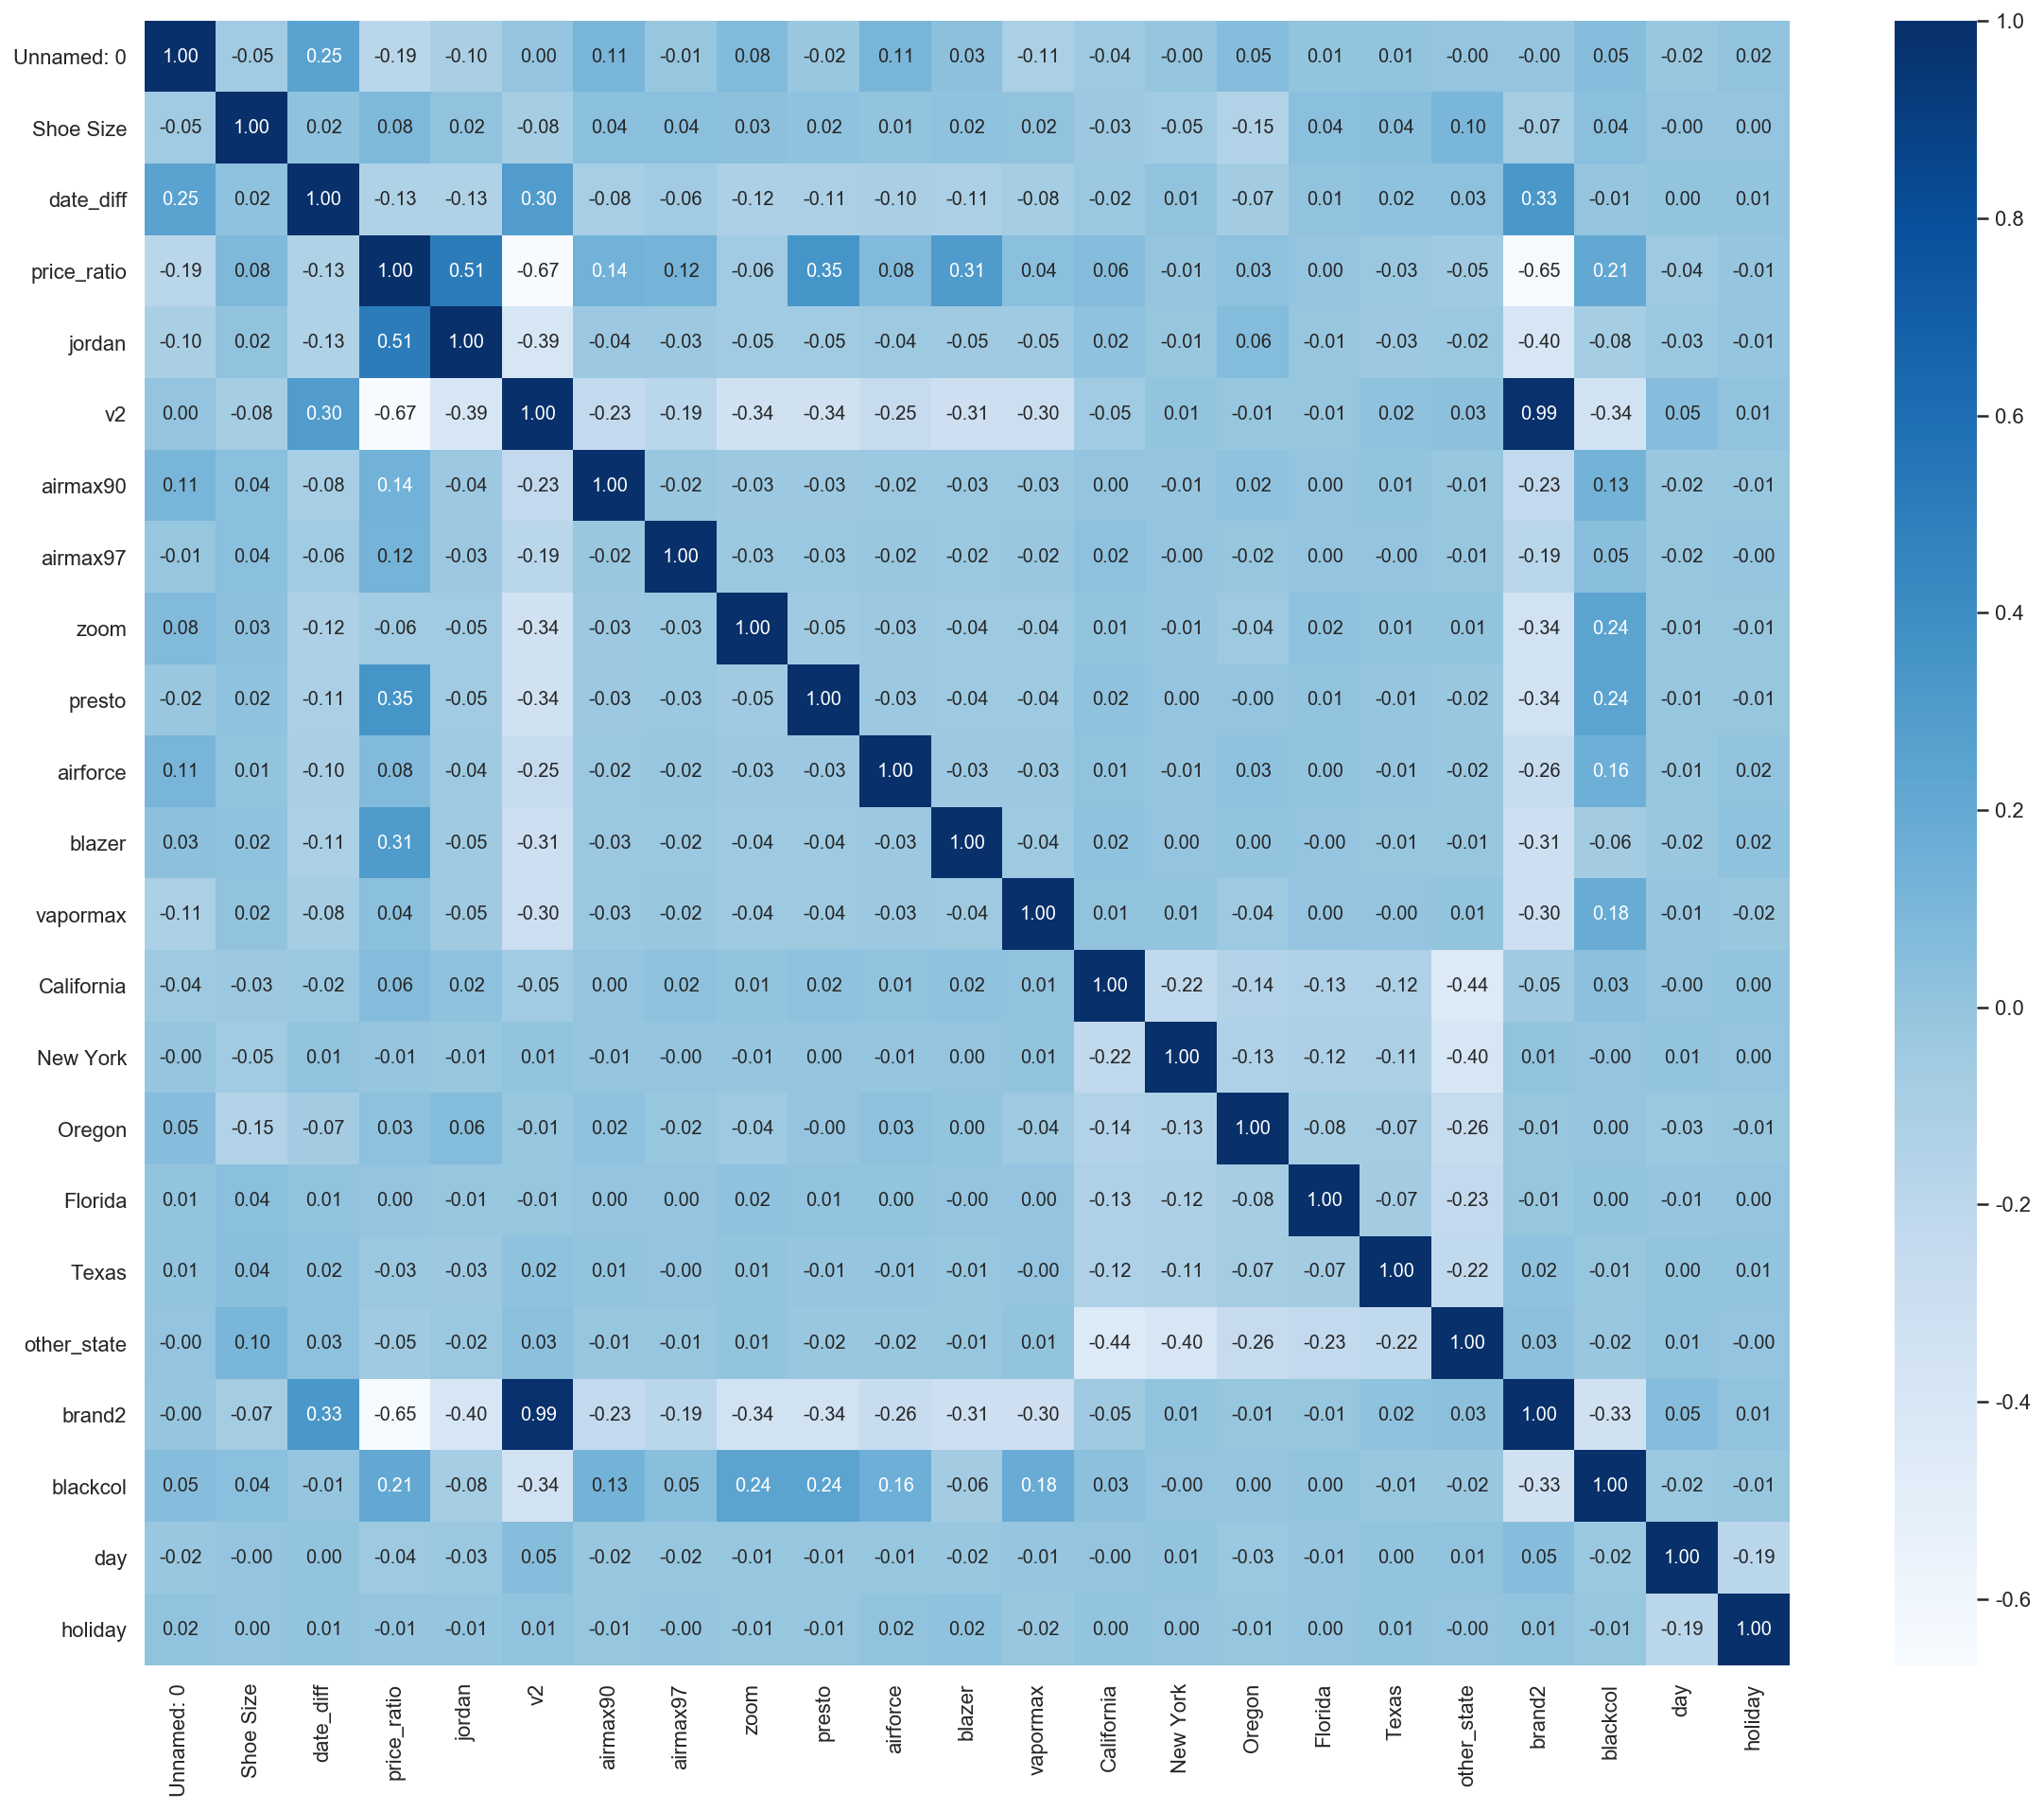

In [130]:
#price_ratio 와 칼럼별 상관관계 분석
corr = data.corr(method='pearson')
plt.figure(figsize=(20,16))
sns.heatmap(corr, cbar = True, annot = True,
            annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Blues')

In [131]:
# 칼럼별 절대값 상관관계 내림차순
corr.loc[:,'price_ratio'].abs().sort_values(ascending=False)[1:]

v2             0.667221
brand2         0.650173
jordan         0.513948
presto         0.352584
blazer         0.307107
blackcol       0.210440
Unnamed: 0     0.191397
airmax90       0.139523
date_diff      0.134612
airmax97       0.122782
Shoe Size      0.082967
airforce       0.079143
California     0.061685
zoom           0.058936
other_state    0.045644
vapormax       0.042200
day            0.039816
Oregon         0.028950
Texas          0.028866
New York       0.007919
holiday        0.007532
Florida        0.001291
Name: price_ratio, dtype: float64

### 1. yeezy + off-white 데이터

In [163]:
data = pd.read_csv("./final.csv")

data["weekend"] = [1 if x>=5 else 0 for x in data.day]
data["weekday"] = [1 if x<5 else 0 for x in data.day]
data.drop(["day", "Unnamed: 0"], axis=1, inplace =True)

data.head()

,Shoe Size,date_diff,price_ratio,jordan,v2,airmax90,airmax97,zoom,presto,airforce,...,New York,Oregon,Florida,Texas,other_state,brand2,blackcol,holiday,weekend,weekday
0,11.0,342.0,4.986364,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,11.0,282.0,3.113636,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,11.0,282.0,3.136364,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,11.5,282.0,4.886364,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
4,11.0,202.0,3.763636,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1


In [164]:
data.rename(columns = {"New York":"new_york"}, inplace=True)
data.rename(columns = {"Shoe Size":"shoe_size"}, inplace=True)

In [165]:
#minmaxscaler 적용
X= data.drop("price_ratio", axis=1)
y = data["price_ratio"]

MM = MinMaxScaler()

MM.fit(X)

X_mm = MM.transform(X)
X_mm_pd = pd.DataFrame(X_mm, columns=X.columns)

X_train, X_test, y_train, y_test =train_test_split(X_mm_pd, y, test_size=0.2, random_state=13)

##### 1. 1 선형회귀분석 모델 적용

#### 1.1.1. 선형회귀적용

In [166]:
reg = LinearRegression()
reg.fit(X_test, y_test)
y_predict = reg.predict(X_test)

##### 잔차가 눈으로 봐도 심하다..

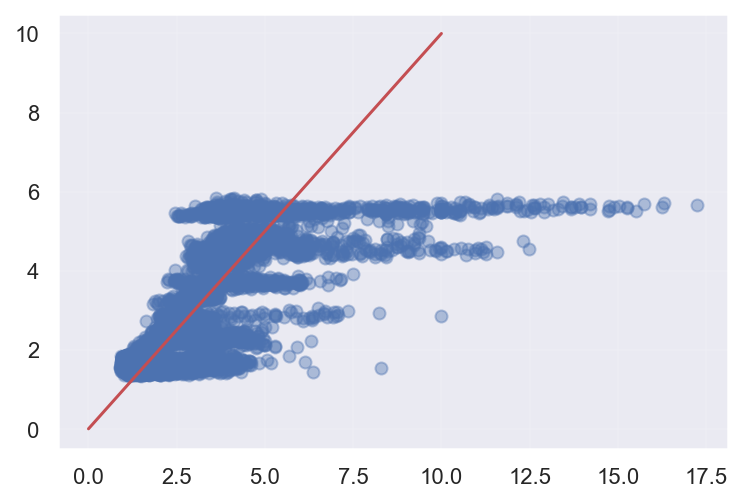

In [167]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot([0,10],[0,10], 'r')

#### 1.1.2 평가 지표 분석

In [168]:
xlabels = X_train.columns
stats_reg.summary(reg, X_train, y_train, xlabels)

Residuals:
     Min      1Q  Median      3Q    Max
-15.8222 -0.2184  0.1978  0.4264  3.154


Coefficients:
             Estimate               Std. Error               t value   p value
_intercept   2.314710  0.010960+239929.606855j    0.000000-0.000000j  0.999992
shoe_size    0.309874       0.018018+0.000000j   17.198000-0.000000j  0.000000
date_diff    0.489631       0.019913-0.000000j   24.588700+0.000000j  0.000000
jordan       3.026072       0.026717+0.000000j  113.262700-0.000000j  0.000000
v2          -3.279432       0.035682+0.000000j  -91.908100+0.000000j  0.000000
airmax90     1.125102       0.034288+0.000000j   32.813700-0.000000j  0.000000
airmax97     1.217938       0.037797+0.000000j   32.223200-0.000000j  0.000000
zoom        -0.882973       0.028315+0.000000j  -31.184200+0.000000j  0.000000
presto       1.920851       0.028214+0.000000j   68.081300-0.000000j  0.000000
airforce     0.324525       0.032084+0.000000j   10.114800-0.000000j  0.000000
blazer       2.185478   

In [169]:
assess(y_test, y_predict)

{'MAE': 0.5429261701467694,
 'MSE': 0.7940507874107627,
 'RMSE': 0.8910952740368242,
 'MSLE': 0.03839674847636546,
 'RMSLE': 0.19595088281598902,
 'R2': 0.6606759327791492}

#### 1.1.3 잔차분석

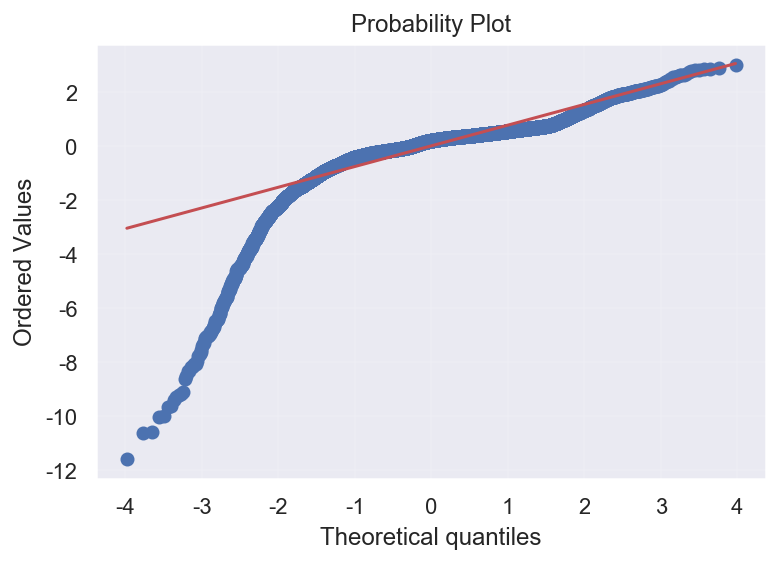

In [170]:
resid = y_predict - y_test
stats.probplot(resid, plot=plt) 
plt.show()

#### 1.2 ols 

#### 1.2.1 ols 분석 적용

In [171]:
dd = ""
for i in X.columns:
#     dd ="price_ratio~"
    dd +=  i + "+"

In [172]:
dd

'shoe_size+date_diff+jordan+v2+airmax90+airmax97+zoom+presto+airforce+blazer+vapormax+California+new_york+Oregon+Florida+Texas+other_state+brand2+blackcol+holiday+weekend+weekday+'

In [173]:
ols = sm.ols(formula ='price_ratio~shoe_size+date_diff+jordan+v2+airmax90+airmax97+zoom+presto+\
airforce+blazer+vapormax+California+new_york+Oregon+Florida+Texas+other_state+brand2+blackcol+\
holiday+weekend+weekday', data=data)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     9727.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:22:16   Log-Likelihood:            -1.2892e+05
No. Observations:               99956   AIC:                         2.579e+05
Df Residuals:                   99935   BIC:                         2.581e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3157      0.025     52.259      0.000       1.266       1.365
shoe_size       0.0244      0.001     20.014      0.000       0.022       0.027
date_diff       0.0003   1.31e-05     24.319      0.000       0.000       0.000
jordan          2.9637      0.042     71.175      0.000       2.882       3.045
v2             -3.1709      0.043    -74.452      0.000      -3.254      -3.087
airmax90        1.0982      0.045     24.551      0.000       1.010       1.186
airmax97        1.2445      0.046     26.795      0.000       1.153       1.335
zoom           -0.8253      0.042    -19.453      0.000      -0.908      -0.742
presto          2.0806      0.042     49.073      0.000       1.998       2.164
airforce        0.3713      0.044      8.457      0.000       0.285       0.457
blazer          2.2030      0.043     51.767      0.000       2.120       2.286
vapormax       -0.0535      0.043     -1.247      0.213      -0.138       0.031
California      0.2888      0.007     38.911      0.000       0.274       0.303
new_york        0.2175      0.008     28.049      0.000       0.202       0.233
Oregon          0.2228      0.010     22.483      0.000       0.203       0.242
Florida         0.2114      0.011     19.778      0.000       0.190       0.232
Texas           0.1857      0.011     16.806      0.000       0.164       0.207
other_state     0.1894      0.006     29.446      0.000       0.177       0.202
brand2          2.2914      0.059     39.123      0.000       2.177       2.406
blackcol        0.5079      0.011     46.566      0.000       0.487       0.529
holiday        -0.0078      0.016     -0.487      0.626      -0.039       0.024
weekend         0.6731      0.013     51.329      0.000       0.647       0.699
weekday         0.6426      0.013     49.900      0.000       0.617       0.668
==============================================================================
Omnibus:                    78149.090   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2795887.163
Skew:                           3.483   Prob(JB):                         0.00
Kurtosis:                      27.956   Cond. No.                     1.24e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.71e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 1.2.2 잔차분석

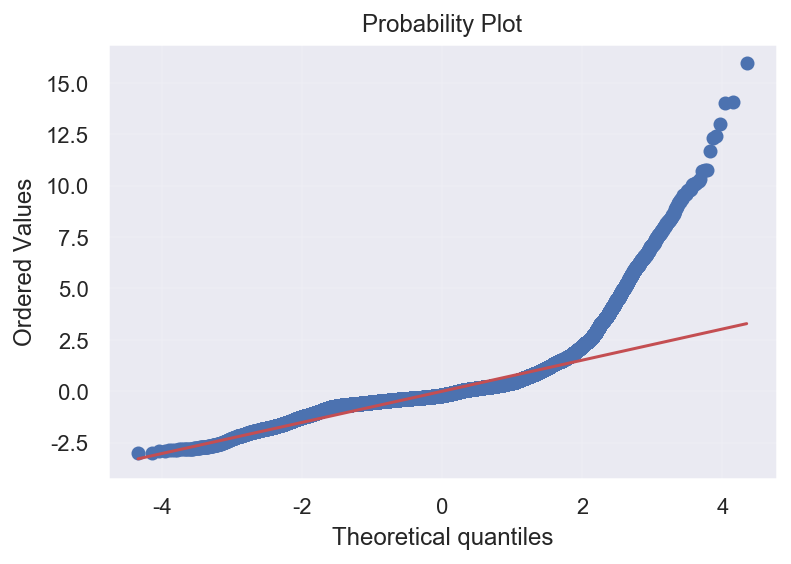

In [174]:
resid = ols.fit().resid
plt.figure()
probplot(resid, plot=plt)
plt.show()

#### 1.2.3 정규성 분석

KeyboardInterrupt: 

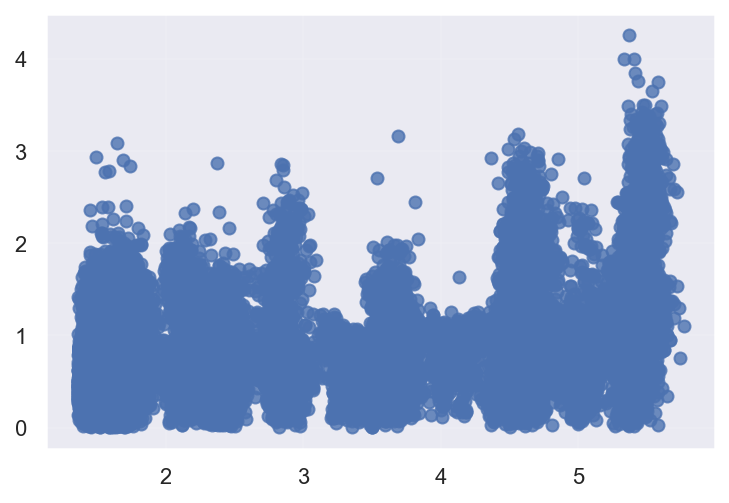

In [175]:
from statsmodels.formula.api import ols
res = ols(formula ='price_ratio~shoe_size+date_diff+jordan+v2+airmax90+airmax97+zoom+presto+\
airforce+blazer+vapormax+California+new_york+Oregon+Florida+Texas+other_state+brand2+blackcol+\
holiday+weekend+weekday', data=data).fit()
fitted = res.predict(data)
residual = data['price_ratio'] - fitted
sr = scipy.stats.zscore(residual)
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

## 2.  Off-white 데이터

#### 2.1.1 선형회귀모델 적용

In [176]:
data.head()

,shoe_size,date_diff,price_ratio,jordan,v2,airmax90,airmax97,zoom,presto,airforce,...,new_york,Oregon,Florida,Texas,other_state,brand2,blackcol,holiday,weekend,weekday
0,11.0,342.0,4.986364,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,11.0,282.0,3.113636,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,11.0,282.0,3.136364,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,11.5,282.0,4.886364,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
4,11.0,202.0,3.763636,0,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1


In [177]:
## Off-white 변수만 남기고 컬럼 제거
data.drop(["v2", "blackcol"], axis=1, inplace =True)
data.head()

,shoe_size,date_diff,price_ratio,jordan,airmax90,airmax97,zoom,presto,airforce,blazer,...,California,new_york,Oregon,Florida,Texas,other_state,brand2,holiday,weekend,weekday
0,11.0,342.0,4.986364,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,11.0,282.0,3.113636,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,11.0,282.0,3.136364,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,11.5,282.0,4.886364,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,11.0,202.0,3.763636,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


##### minmaxscaler 적용

In [178]:
X_ow= data.drop("price_ratio", axis=1)
y_ow = data["price_ratio"]

MM_ow = MinMaxScaler()

MM_ow.fit(X_ow)

X_mm_ow = MM_ow.transform(X_ow)
X_mm_ow_pd = pd.DataFrame(X_mm_ow, columns=X_ow.columns)

In [179]:
X_ow_train, X_ow_test, y_ow_train, y_ow_test = train_test_split\
                                                        (X_mm_ow_pd, y_ow, test_size=0.2, random_state=13)

In [180]:
import math

In [181]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
for name, model in models:
    ax = model
    ax.fit(X_ow_train, y_ow_train)
    
    y_pred_tr = ax.predict(X_ow_train)
    y_pred_test = ax.predict(X_ow_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_ow_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_ow_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_ow_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_ow_test, y_pred_test)),2))

-------- LinearRegression -----------
r-square(train) :  0.63
r-square(test) :  0.63
rmse(train) :  0.91
rmse(test) :  0.93
-------- DecisionTreeRegressor -----------
r-square(train) :  0.59
r-square(test) :  0.59
rmse(train) :  0.96
rmse(test) :  0.97
-------- RandomForestRegressor -----------
r-square(train) :  0.61
r-square(test) :  0.61
rmse(train) :  0.94
rmse(test) :  0.96
-------- GradientBoostingRegressor -----------
r-square(train) :  0.79
r-square(test) :  0.79
rmse(train) :  0.7
rmse(test) :  0.71
-------- XGBRegressor -----------
r-square(train) :  0.78
r-square(test) :  0.78
rmse(train) :  0.7
rmse(test) :  0.71


#### 2.1.1 선형회귀모델 적용

In [184]:
reg.fit(X_ow_train, y_ow_train)
y_predict = reg.predict(X_ow_test)

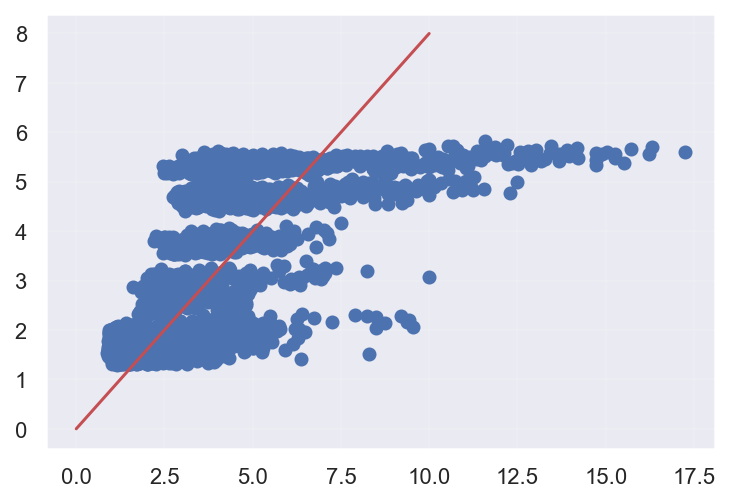

In [185]:
plt.scatter(y_ow_test, y_predict)
plt.plot([0,10],[0,8], 'r')
plt.show()

#### 2.1.2 평가지표 분석 

In [186]:
xlabels = X_ow_train.columns
stats_reg.summary(reg, X_ow_train, y_ow_train, xlabels)

Residuals:
     Min     1Q  Median      3Q     Max
-15.9388 -0.225  0.1745  0.4583  2.9673


Coefficients:
                 Estimate                   Std. Error                     t value   p value
_intercept  -6.697748e+12  74529.062495+305861.470084j -5.036807e+06+2.067066e+07j  0.000000
shoe_size    3.779380e-01           0.018977-0.000000j  1.991540e+01+0.000000e+00j  0.000000
date_diff    8.475520e-01           0.020349-0.000000j  4.165050e+01+0.000000e+00j  0.000000
jordan       2.962721e+00           0.027387+0.000000j  1.081793e+02-0.000000e+00j  0.000000
airmax90     1.299787e+00           0.035395+0.000000j  3.672200e+01-0.000000e+00j  0.000000
airmax97     1.368860e+00           0.039181+0.000000j  3.493720e+01-0.000000e+00j  0.000000
zoom        -5.728980e-01           0.028936-0.000000j -1.979870e+01-0.000000e+00j  0.000000
presto       2.355569e+00           0.028810-0.000000j  8.176100e+01+0.000000e+00j  0.000000
airforce     6.026990e-01           0.033048+0.000000j  

In [187]:
assess(y_ow_test, y_predict)

{'MAE': 0.5665064852095193,
 'MSE': 0.8563668731618189,
 'RMSE': 0.925400925632679,
 'MSLE': 0.044372081502756774,
 'RMSLE': 0.21064681697751042,
 'R2': 0.6340462158824727}

#### 2. 2.1 ols 분석

In [188]:
df1 = pd.concat([X_mm_ow_pd,y_ow], axis=1)

In [189]:
df1.columns = df1.columns.str.replace(" ", "")

In [190]:
dd = ""
for i in df1.columns:
#     dd ="price_ratio~"
    dd +=  i + "+"

In [191]:
dd

'shoe_size+date_diff+jordan+airmax90+airmax97+zoom+presto+airforce+blazer+vapormax+California+new_york+Oregon+Florida+Texas+other_state+brand2+holiday+weekend+weekday+price_ratio+'

In [192]:
ols = sm.ols(formula ='price_ratio~shoe_size+date_diff+jordan+airmax90+airmax97+zoom+presto+\
airforce+blazer+vapormax+California+new_york+Oregon+Florida+Texas+other_state+brand2+holiday+\
weekend+weekday', data=df1)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     9538.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:23:38   Log-Likelihood:            -1.3296e+05
No. Observations:               99956   AIC:                         2.660e+05
Df Residuals:                   99937   BIC:                         2.661e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3118      0.026     51.298      0.000       1.262       1.362
shoe_size       0.3606      0.017     21.053      0.000       0.327       0.394
date_diff       0.8476      0.018     45.976      0.000       0.811       0.884
jordan          2.9813      0.043     68.764      0.000       2.896       3.066
airmax90        1.3017      0.046     28.064      0.000       1.211       1.393
airmax97        1.3626      0.048     28.212      0.000       1.268       1.457
zoom           -0.5851      0.044    -13.331      0.000      -0.671      -0.499
presto          2.3169      0.044     52.820      0.000       2.231       2.403
airforce        0.5921      0.045     13.014      0.000       0.503       0.681
blazer          2.2232      0.044     50.175      0.000       2.136       2.310
vapormax        0.1514      0.044      3.405      0.001       0.064       0.239
California      0.3033      0.008     39.522      0.000       0.288       0.318
new_york        0.2189      0.008     27.258      0.000       0.203       0.235
Oregon          0.2326      0.010     22.530      0.000       0.212       0.253
Florida         0.2075      0.011     18.747      0.000       0.186       0.229
Texas           0.1687      0.011     14.749      0.000       0.146       0.191
other_state     0.1809      0.007     27.419      0.000       0.168       0.194
brand2         -0.8719      0.042    -20.862      0.000      -0.954      -0.790
holiday        -0.0140      0.017     -0.835      0.404      -0.047       0.019
weekend         0.6701      0.013     50.216      0.000       0.644       0.696
weekday         0.6417      0.013     48.998      0.000       0.616       0.667
==============================================================================
Omnibus:                    73192.611   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2057046.529
Skew:                           3.236   Prob(JB):                         0.00
Kurtosis:                      24.261   Cond. No.                     2.31e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.1e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 2.2.2 잔차 분석

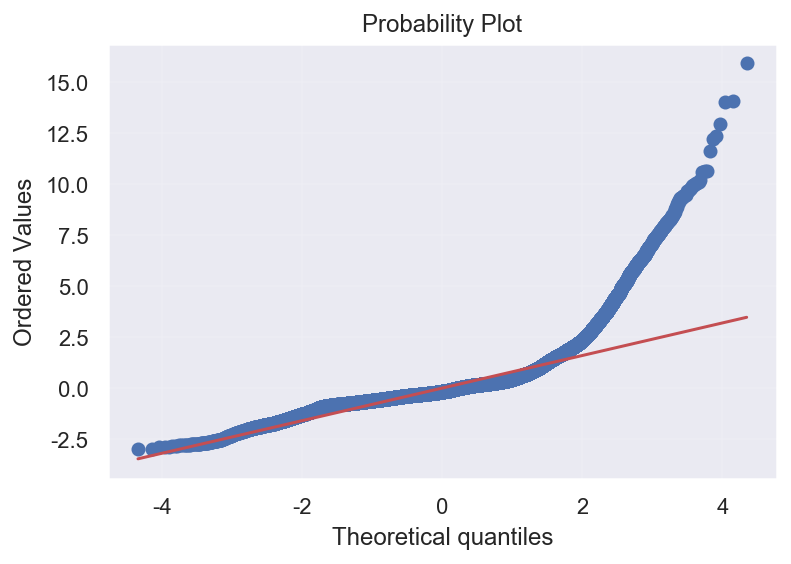

In [193]:
resid = ols.fit().resid

plt.figure()
probplot(resid, plot=plt)
plt.show()

#### 2.2.3 정규성 분석

KeyboardInterrupt: 

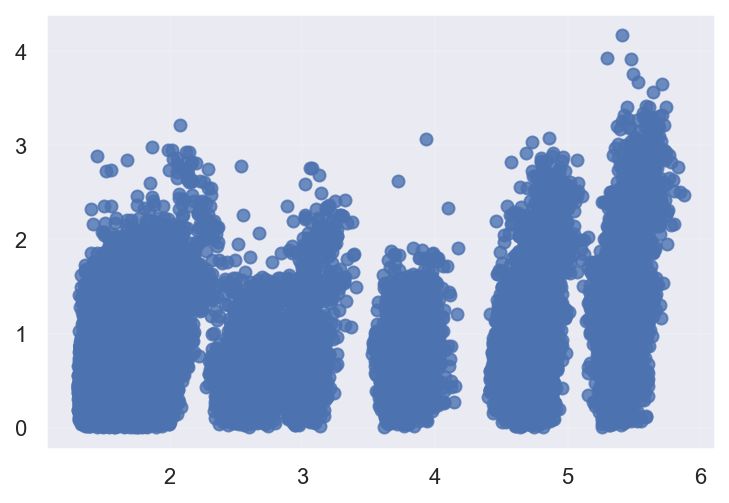

In [194]:
from statsmodels.formula.api import ols
res = ols('price_ratio~shoe_size+date_diff+jordan+airmax90+airmax97+zoom+presto+\
airforce+blazer+vapormax+California+new_york+Oregon+Florida+Texas+other_state+brand2+holiday+\
weekend+weekday', data=df1).fit()
fitted = res.predict(df1)
residual = df1['price_ratio'] - fitted
sr = scipy.stats.zscore(residual)
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

## Yeezy 데이터

In [195]:
data_yz = pd.read_csv("./Yeezy.csv")
data_yz.drop(["Unnamed: 0"], axis=1, inplace =True)
data_yz.head()

,Shoe Size,color_counts,date_diff,price_ratio,California,New York,Oregon,Florida,holiday,weekend,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,11.0,3,342.0,4.986364,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1,8.0,3,343.0,3.863636,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
2,10.0,3,344.0,4.854545,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,9.0,3,345.0,4.363636,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
4,6.0,3,346.0,3.954545,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0


In [196]:
data_yz.columns = data_yz.columns.str.replace(" ","")

In [197]:
data = data_yz.copy()

#### minmaxscaler 적용 

In [198]:
X_yz= data.drop("price_ratio", axis=1)
y_yz = data["price_ratio"]

MM_yz = MinMaxScaler()

MM_yz.fit(X_yz)

X_mm_yz = MM_yz.transform(X_yz)
X_mm_yz_pd = pd.DataFrame(X_mm_yz, columns=X_yz.columns)

In [199]:
X_mm_yz_pd

,ShoeSize,color_counts,date_diff,California,NewYork,Oregon,Florida,holiday,weekend,weekdays,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,0.555556,0.666667,0.288000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.333333,0.666667,0.288727,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.481481,0.666667,0.289455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.407407,0.666667,0.290182,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.185185,0.666667,0.290909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,0.333333,0.333333,0.074909,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
72158,0.370370,0.333333,0.074909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
72159,0.148148,0.333333,0.074909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
72160,0.555556,0.333333,0.074909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


#### 선형 회귀 분석 적용 

In [200]:
X_yz_train, X_yz_test, y_yz_train, y_yz_test = train_test_split(X_mm_yz_pd, y_yz, test_size=0.2, random_state=13)

In [201]:
for name, model in models:
    ax = model
    ax.fit(X_yz_train, y_yz_train)

    y_pred_tr = reg.predict(X_yz_train)
    y_pred_test = reg.predict(X_yz_test)
    
    print('--------', name, '-----------')
    print('r-square(train) : ', round(r2_score(y_yz_train, y_pred_tr),2))
    print('r-square(test) : ', round(r2_score(y_yz_test, y_pred_test),2))
    print('rmse(train) : ', round(math.sqrt(mean_squared_error(y_yz_train, y_pred_tr)),2))
    print('rmse(test) : ', round(math.sqrt(mean_squared_error(y_yz_test, y_pred_test)),2))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 36)

In [202]:
reg.fit(X_yz_train, y_yz_train)
y_predict = reg.predict(X_yz_test)

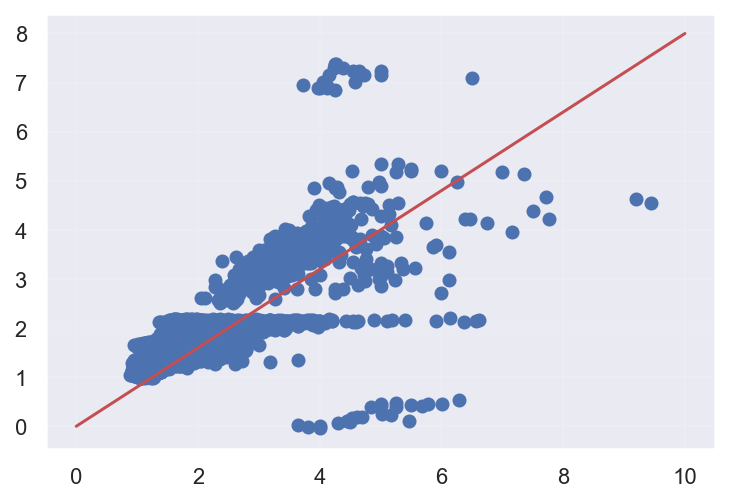

In [203]:
plt.scatter(y_yz_test, y_predict)
plt.plot([0,10],[0,8], 'r')
plt.show()

In [204]:
xlabels = X_yz_train.columns
stats_reg.summary(reg, X_yz_train, y_yz_train, xlabels)

Residuals:
    Min      1Q  Median      3Q     Max
-9.6652 -0.0913  0.0647  0.1842  3.3864


Coefficients:
                          Estimate                  Std. Error                     t value   p value
_intercept           -2.720866e+10  1.981245e+05+2.215609e+05j -6.102046e+04+6.823863e+04j  0.000000
ShoeSize              9.186300e-02  1.366900e-02-1.020000e-04j  6.720300e+00+5.020000e-02j  0.000000
color_counts          1.303723e+01  1.199120e-01+1.100000e-05j  1.087231e+02-1.020000e-02j  0.000000
date_diff            -1.650652e+00  1.929800e-02+2.270000e-04j -8.552240e+01+1.005900e+00j  0.000000
California            2.082500e-02  2.485000e-03-1.391000e-03j  6.379800e+00+3.571200e+00j  0.000000
NewYork               1.236100e-02  4.474000e-03-4.800000e-04j  2.731400e+00+2.929000e-01j  0.006015
Oregon                4.352300e-02  6.476000e-03-5.700000e-05j  6.719900e+00+5.940000e-02j  0.000000
Florida               2.510900e-02  6.837000e-03+1.100000e-05j  3.672500e+00-6.100000

In [206]:
!pip install assess

  Created wheel for assess: filename=assess-1.0-py3-none-any.whl size=11414 sha256=5f72baa5b955681ecfa299b1b3f6088761864eca3640bd6f764925aa1afcb738
  Stored in directory: /Users/jeongseong-yong/Library/Caches/pip/wheels/02/ab/f9/f3d805608b3ad668cbfc36a4a4b79c8aeae7885538fad19197
Successfully built assess


In [208]:
import assess

In [209]:
assess(y_yz_test, y_predict)

TypeError: 'module' object is not callable

In [210]:
xlabels = X_yz_train.columns
stats_reg.summary(reg, X_yz_train, y_yz_train, xlabels)

Residuals:
    Min      1Q  Median      3Q     Max
-9.6652 -0.0913  0.0647  0.1842  3.3864


Coefficients:
                          Estimate                  Std. Error                     t value   p value
_intercept           -2.720866e+10  1.981245e+05+2.215609e+05j -6.102046e+04+6.823863e+04j  0.000000
ShoeSize              9.186300e-02  1.366900e-02-1.020000e-04j  6.720300e+00+5.020000e-02j  0.000000
color_counts          1.303723e+01  1.199120e-01+1.100000e-05j  1.087231e+02-1.020000e-02j  0.000000
date_diff            -1.650652e+00  1.929800e-02+2.270000e-04j -8.552240e+01+1.005900e+00j  0.000000
California            2.082500e-02  2.485000e-03-1.391000e-03j  6.379800e+00+3.571200e+00j  0.000000
NewYork               1.236100e-02  4.474000e-03-4.800000e-04j  2.731400e+00+2.929000e-01j  0.006015
Oregon                4.352300e-02  6.476000e-03-5.700000e-05j  6.719900e+00+5.940000e-02j  0.000000
Florida               2.510900e-02  6.837000e-03+1.100000e-05j  3.672500e+00-6.100000

##### ols 

In [211]:
df1 = pd.concat([X_mm_yz_pd,y_yz], axis=1)

In [212]:
df1

,ShoeSize,color_counts,date_diff,California,NewYork,Oregon,Florida,holiday,weekend,weekdays,...,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y,price_ratio
0,0.555556,0.666667,0.288000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.986364
1,0.333333,0.666667,0.288727,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.863636
2,0.481481,0.666667,0.289455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.854545
3,0.407407,0.666667,0.290182,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.363636
4,0.185185,0.666667,0.290909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,0.333333,0.333333,0.074909,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.568182
72158,0.370370,0.333333,0.074909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.718182
72159,0.148148,0.333333,0.074909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.750000
72160,0.555556,0.333333,0.074909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.954545


In [213]:
dd = ""
for i in df1.columns:
#     dd ="price_ratio~"
    dd +=  i + "+"
    
    

In [214]:
dd

'ShoeSize+color_counts+date_diff+California+NewYork+Oregon+Florida+holiday+weekend+weekdays+body_color_Beige+body_color_Black+body_color_Grey+body_color_White+body_color_Yellow+stripe_color_Beige+stripe_color_Black+stripe_color_Blank+stripe_color_Green+stripe_color_Grey+stripe_color_Orange+stripe_color_Red+stripe_color_White+stripe_color_Yello+trim_color_Beige+trim_color_Black+trim_color_Blue+trim_color_Grey+trim_color_White+trim_color_Yellow+stripe_with_letter_N+stripe_with_letter_Y+Handle_N+Handle_Y+reflective_N+reflective_Y+price_ratio+'

In [215]:
b = dd.replace("price_ratio+", '')[:-1]

In [216]:
df1

,ShoeSize,color_counts,date_diff,California,NewYork,Oregon,Florida,holiday,weekend,weekdays,...,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y,price_ratio
0,0.555556,0.666667,0.288000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.986364
1,0.333333,0.666667,0.288727,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.863636
2,0.481481,0.666667,0.289455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.854545
3,0.407407,0.666667,0.290182,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.363636
4,0.185185,0.666667,0.290909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,0.333333,0.333333,0.074909,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.568182
72158,0.370370,0.333333,0.074909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.718182
72159,0.148148,0.333333,0.074909,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.750000
72160,0.555556,0.333333,0.074909,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.954545


In [217]:
ols = sm.ols(formula ='price_ratio~ShoeSize+color_counts+date_diff+California+NewYork+Oregon+\
Florida+holiday+weekend+weekdays+body_color_Beige+body_color_Black+body_color_Grey\
+body_color_White+body_color_Yellow+stripe_color_Beige+stripe_color_Black+stripe_color_Blank+\
stripe_color_Green+stripe_color_Grey+stripe_color_Orange+stripe_color_Red+stripe_color_White+\
stripe_color_Yello+trim_color_Beige+trim_color_Black+trim_color_Blue+trim_color_Grey+\
trim_color_White+trim_color_Yellow+stripe_with_letter_N+stripe_with_letter_Y+Handle_N+Handle_Y+\
reflective_N+reflective_Y', data=df1)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            price_ratio   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     5332.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:26:33   Log-Likelihood:                -35766.
No. Observations:               72162   AIC:                         7.158e+04
Df Residuals:                   72136   BIC:                         7.182e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1201      0.009     13.583      0.000       0.103       0.137
ShoeSize                 0.0986      0.009     11.532      0.000       0.082       0.115
color_counts            12.4783      0.112    111.608      0.000      12.259      12.697
date_diff               -1.6355      0.018    -89.994      0.000      -1.671      -1.600
California               0.0185      0.004      4.544      0.000       0.011       0.026
NewYork                  0.0097      0.004      2.312      0.021       0.001       0.018
Oregon                   0.0450      0.006      7.495      0.000       0.033       0.057
Florida                  0.0217      0.006      3.449      0.001       0.009       0.034
holiday                 -0.0101      0.008     -1.211      0.226      -0.027       0.006
weekend                  0.0640      0.005     13.415      0.000       0.055       0.073
weekdays                 0.0561      0.005     11.944      0.000       0.047       0.065
body_color_Beige         1.7680      0.021     86.194      0.000       1.728       1.808
body_color_Black        -0.4175      0.014    -29.382      0.000      -0.445      -0.390
body_color_Grey         -2.6675      0.022   -122.730      0.000      -2.710      -2.625
body_color_White         2.0911      0.019    108.201      0.000       2.053       2.129
body_color_Yellow       -0.6539      0.007    -90.070      0.000      -0.668      -0.640
stripe_color_Beige      -0.6355      0.025    -25.457      0.000      -0.684      -0.587
stripe_color_Black       2.8914      0.042     68.455      0.000       2.809       2.974
stripe_color_Blank       1.4474      0.014    106.502      0.000       1.421       1.474
stripe_color_Green      -0.8123      0.026    -30.819      0.000      -0.864      -0.761
stripe_color_Grey       -0.9014      0.019    -47.469      0.000      -0.939      -0.864
stripe_color_Orange     -1.4969      0.054    -27.682      0.000      -1.603      -1.391
stripe_color_Red         0.6335      0.022     28.307      0.000       0.590       0.677
stripe_color_White      -0.3917      0.016    -24.947      0.000      -0.422      -0.361
stripe_color_Yello      -0.6145      0.019    -31.826      0.000      -0.652      -0.577
trim_color_Beige         1.7680      0.021     86.194      0.000       1.728       1.808
trim_color_Black         1.8197      0.013    142.339      0.000       1.795       1.845
trim_color_Blue         -3.3212      0.035    -95.986      0.000      -3.389      -3.253
trim_color_Grey          1.4331      0.027     53.336      0.000       1.380       1.486
trim_color_White        -0.9255      0.009   -102.089      0.000      -0.943      -0.908
trim_color_Yellow       -0.6539      0.007    -90.070      0.000      -0.668      -0.640
stripe_with_letter_N     2.7590      0.019    141.978    

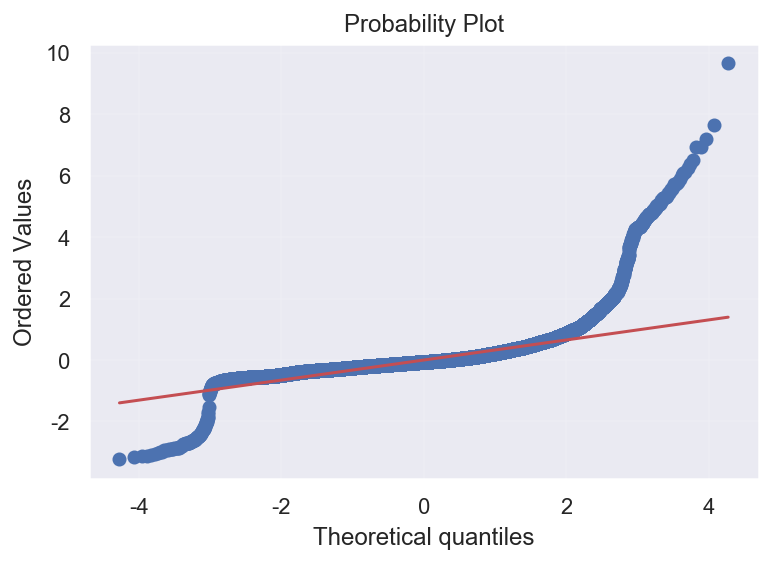

In [218]:
resid = ols.fit().resid
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [219]:
res = ols('price_ratio~ShoeSize+color_counts+date_diff+California+NewYork+Oregon+Florida+holiday+weekend+weekdays+body_color_Beige+body_color_Black+body_color_Grey+body_color_White+body_color_Yellow+stripe_color_Beige+stripe_color_Black+stripe_color_Blank+stripe_color_Green+stripe_color_Grey+stripe_color_Orange+stripe_color_Red+stripe_color_White+stripe_color_Yello+trim_color_Beige+trim_color_Black+trim_color_Blue+trim_color_Grey+trim_color_White+trim_color_Yellow+stripe_with_letter_N+stripe_with_letter_Y+Handle_N+Handle_Y+reflective_N+reflective_Y', data=df1).fit()
fitted = res.predict(df1)
residual = df1['price_ratio'] - fitted
sr = scipy.stats.zscore(residual)
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

TypeError: 'OLS' object is not callable

# 이상치 : 할 거 없으면, 

## Yeezy 데이터

In [10]:
data_yz = pd.read_csv("./Yeezy.csv")
data_yz.drop(["Unnamed: 0"], axis=1, inplace =True)
data_yz.head()

,Shoe Size,color_counts,date_diff,price_ratio,California,New York,Oregon,Florida,holiday,weekend,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,11.0,3,342.0,4.986364,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1,8.0,3,343.0,3.863636,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
2,10.0,3,344.0,4.854545,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,9.0,3,345.0,4.363636,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
4,6.0,3,346.0,3.954545,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0


In [11]:
data_yz.columns = data_yz.columns.str.replace(" ","")

In [12]:
data = data_yz.copy()

In [13]:
data

,ShoeSize,color_counts,date_diff,price_ratio,California,NewYork,Oregon,Florida,holiday,weekend,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,11.0,3,342.0,4.986364,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
1,8.0,3,343.0,3.863636,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
2,10.0,3,344.0,4.854545,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,1,0
3,9.0,3,345.0,4.363636,1,0,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
4,6.0,3,346.0,3.954545,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,8.0,2,49.0,2.568182,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72158,8.5,2,49.0,2.718182,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72159,5.5,2,49.0,2.750000,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72160,11.0,2,49.0,2.954545,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


In [14]:
tmp_y=[1]*len(data["price_ratio"])

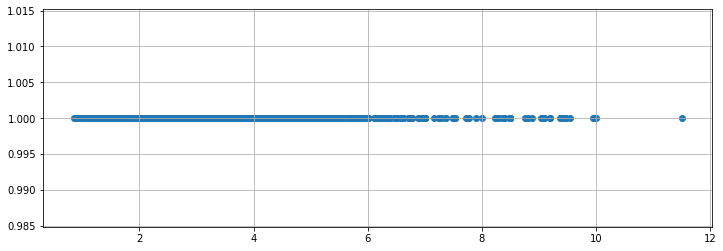

In [17]:
plt.figure(figsize=(12,4))
plt.scatter(data["price_ratio"], tmp_y)
plt.grid()
plt.show()

In [18]:
iqr = np.percentile(data["price_ratio"], 75) - np.percentile(data["price_ratio"], 25)
iqr*2.0

1.190909090909091

In [21]:
q1 = np.percentile(data["price_ratio"], 25)
q2 = np.median(data["price_ratio"])
q3 = np.percentile(data["price_ratio"], 75)
upper_fence = q3 + iqr*2.0
lower_fence = q1 - iqr*2.0

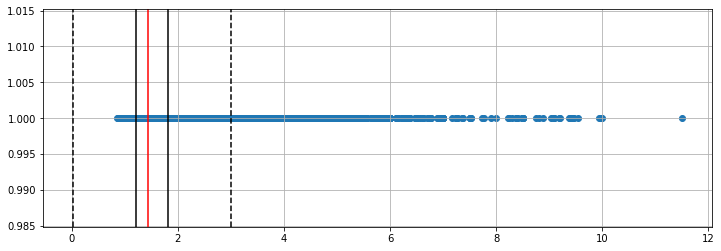

In [22]:
plt.figure(figsize=(12,4))
plt.scatter(data["price_ratio"], tmp_y)
plt.axvline(x=q1, color='black')
plt.axvline(x=q2, color='red')
plt.axvline(x=q3, color='black')
plt.axvline(x=upper_fence, color='black', ls='dashed')
plt.axvline(x=lower_fence, color='black', ls='dashed')
plt.grid()
plt.show()

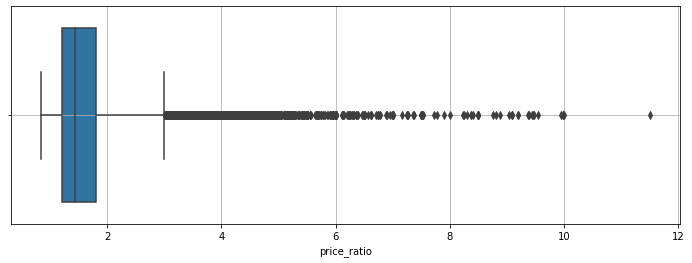

In [23]:
plt.figure(figsize=(12,4))
sns.boxplot(data["price_ratio"], whis=2.0)
plt.grid()
plt.show()

In [24]:
upper_fence

3.004545454545455

In [25]:
df_yeezy_1 = data.loc[data["price_ratio"] < upper_fence,:]
df_yeezy_1

,ShoeSize,color_counts,date_diff,price_ratio,California,NewYork,Oregon,Florida,holiday,weekend,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
253,5.0,3,613.0,2.909091,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
260,7.5,3,614.0,3.000000,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,1,0
261,7.0,3,615.0,2.954545,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,1,0
286,5.0,3,646.0,2.800000,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,1,0
295,8.5,3,662.0,2.954545,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72157,8.0,2,49.0,2.568182,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72158,8.5,2,49.0,2.718182,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72159,5.5,2,49.0,2.750000,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
72160,11.0,2,49.0,2.954545,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


## 이상치 제거 후 minmaxscaler 적용

In [26]:
X_yz= df_yeezy_1.drop("price_ratio", axis=1)
y_yz = df_yeezy_1["price_ratio"]

MM_yz = MinMaxScaler()

MM_yz.fit(X_yz)

X_mm_yz = MM_yz.transform(X_yz)
X_mm_yz_pd = pd.DataFrame(X_mm_yz, columns=X_yz.columns)

In [27]:
X_mm_yz_pd

,ShoeSize,color_counts,date_diff,California,NewYork,Oregon,Florida,holiday,weekend,weekdays,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,0.12,0.666667,0.722644,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.32,0.666667,0.723727,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.28,0.666667,0.724810,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.12,0.666667,0.758397,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.40,0.666667,0.775731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68437,0.36,0.333333,0.111593,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
68438,0.40,0.333333,0.111593,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
68439,0.16,0.333333,0.111593,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
68440,0.60,0.333333,0.111593,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [28]:
X = X_mm_yz_pd
y = y_yz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [6]:
from xgboost import XGBRegressor


In [264]:
xgb= XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [265]:
xgb.score(X_test, y_test)

0.9769794360736973

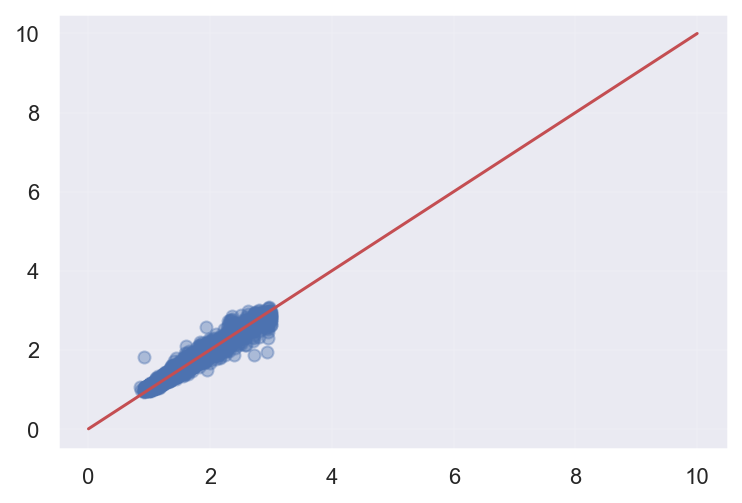

In [266]:
plt.scatter(y_test, xgb_pred, alpha=0.4)
plt.plot([0,10],[0,10], 'r')

In [5]:
import statsmodels.api as sm

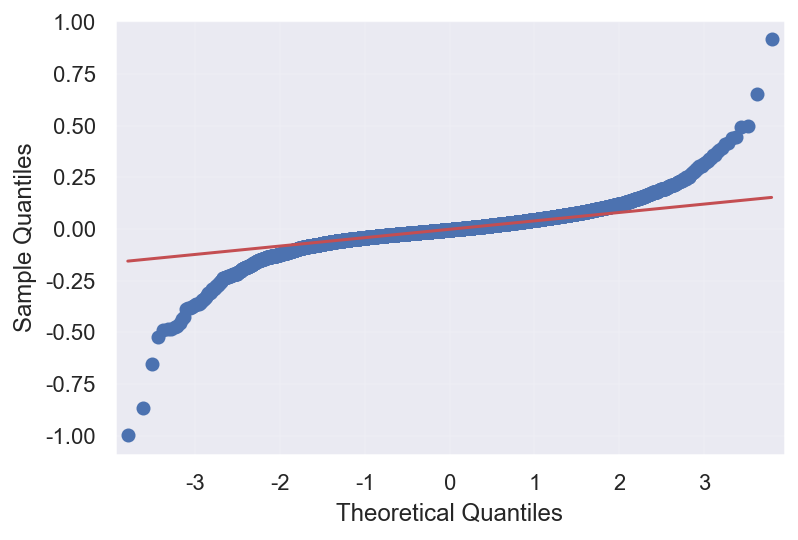

In [269]:
#Getting test predictions
test_preds_yeezy = xgb.predict(X_test)

#Calculating residuals
residuals = test_preds_yeezy - y_test

#Plotting QQ-plot
sm.qqplot(residuals,line="q");

In [270]:
# 모델의 평균 절대 백분율 오류(MAPE)
xgb_mape = np.mean(100 * abs((residuals/y_test)))
xgb_mape

2.556079315131845

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [273]:
X_yz= df_yeezy_1.drop("price_ratio", axis=1)
y_yz = df_yeezy_1["price_ratio"]

X_train, X_test, y_train, y_test = train_test_split(X_yz, y_yz, test_size=0.2, random_state=13)

In [278]:
estimators=[('scaler', MinMaxScaler()),
            ('reg', XGBRegressor(random_state=13))]
pipe = Pipeline(estimators)
params = [{
     'reg__max_depth' : [6, 8, 10, 100],
     'reg__n_estimarots' : [10,100,400,1000],
     'reg__learning_rate': [0.1, 0.5, 1]
}]

gridsearch = GridSearchCV(estimator=pipe, param_grid=params,
                          return_train_score=True, cv=5, verbose=2)
gridsearch.fit(X_train,y_train)
# pred = gridsearch.best_estimator_.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10 ..
[18:14:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10, total=   1.9s
[CV] reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10 ..
[18:14:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10, total=   2.0s
[CV] reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10 ..
[18:14:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10, total=   1.9s
[CV] reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=10 ..
[18:14:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[CV]  reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=1000, total=   2.1s
[CV] reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=1000 
[18:14:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=1000, total=   2.1s
[CV] reg__learning_rate=0.1, reg__max_depth=6, reg__n_estimarots=1000 
[18:14:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please ope

[CV]  reg__learning_rate=0.1, reg__max_depth=8, reg__n_estimarots=400, total=   3.2s
[CV] reg__learning_rate=0.1, reg__max_depth=8, reg__n_estimarots=400 .
[18:15:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.1, reg__max_depth=8, reg__n_estimarots=400, total=   2.8s
[CV] reg__learning_rate=0.1, reg__max_depth=8, reg__n_estimarots=1000 
[18:15:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open 

[CV]  reg__learning_rate=0.1, reg__max_depth=10, reg__n_estimarots=100, total=   3.4s
[CV] reg__learning_rate=0.1, reg__max_depth=10, reg__n_estimarots=400 
[18:16:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.1, reg__max_depth=10, reg__n_estimarots=400, total=   3.2s
[CV] reg__learning_rate=0.1, reg__max_depth=10, reg__n_estimarots=400 
[18:16:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please ope

[CV]  reg__learning_rate=0.1, reg__max_depth=100, reg__n_estimarots=100, total=  12.2s
[CV] reg__learning_rate=0.1, reg__max_depth=100, reg__n_estimarots=100 
[18:18:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.1, reg__max_depth=100, reg__n_estimarots=100, total=  12.8s
[CV] reg__learning_rate=0.1, reg__max_depth=100, reg__n_estimarots=100 
[18:18:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please

[CV]  reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=10, total=   1.9s
[CV] reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=10 ..
[18:21:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=10, total=   2.0s
[CV] reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=10 ..
[18:21:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[CV]  reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=1000, total=   2.2s
[CV] reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=1000 
[18:22:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=1000, total=   2.0s
[CV] reg__learning_rate=0.5, reg__max_depth=6, reg__n_estimarots=1000 
[18:22:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please ope

[CV]  reg__learning_rate=0.5, reg__max_depth=8, reg__n_estimarots=400, total=   2.6s
[CV] reg__learning_rate=0.5, reg__max_depth=8, reg__n_estimarots=400 .
[18:22:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.5, reg__max_depth=8, reg__n_estimarots=400, total=   2.8s
[CV] reg__learning_rate=0.5, reg__max_depth=8, reg__n_estimarots=1000 
[18:22:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open 

[CV]  reg__learning_rate=0.5, reg__max_depth=10, reg__n_estimarots=100, total=   3.3s
[CV] reg__learning_rate=0.5, reg__max_depth=10, reg__n_estimarots=400 
[18:23:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.5, reg__max_depth=10, reg__n_estimarots=400, total=   3.2s
[CV] reg__learning_rate=0.5, reg__max_depth=10, reg__n_estimarots=400 
[18:23:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please ope

[CV]  reg__learning_rate=0.5, reg__max_depth=100, reg__n_estimarots=100, total=   3.3s
[CV] reg__learning_rate=0.5, reg__max_depth=100, reg__n_estimarots=100 
[18:24:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=0.5, reg__max_depth=100, reg__n_estimarots=100, total=   3.1s
[CV] reg__learning_rate=0.5, reg__max_depth=100, reg__n_estimarots=100 
[18:24:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please

[CV]  reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=10, total=   2.1s
[CV] reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=10 ....
[18:25:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=10, total=   2.0s
[CV] reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=10 ....
[18:25:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an iss

[CV]  reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=1000, total=   2.0s
[CV] reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=1000 ..
[18:25:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=1000, total=   2.0s
[CV] reg__learning_rate=1, reg__max_depth=6, reg__n_estimarots=1000 ..
[18:25:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[CV]  reg__learning_rate=1, reg__max_depth=8, reg__n_estimarots=400, total=   3.1s
[CV] reg__learning_rate=1, reg__max_depth=8, reg__n_estimarots=400 ...
[18:26:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=1, reg__max_depth=8, reg__n_estimarots=400, total=   3.0s
[CV] reg__learning_rate=1, reg__max_depth=8, reg__n_estimarots=1000 ..
[18:26:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an i

[CV]  reg__learning_rate=1, reg__max_depth=10, reg__n_estimarots=100, total=   3.3s
[CV] reg__learning_rate=1, reg__max_depth=10, reg__n_estimarots=400 ..
[18:27:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=1, reg__max_depth=10, reg__n_estimarots=400, total=   3.2s
[CV] reg__learning_rate=1, reg__max_depth=10, reg__n_estimarots=400 ..
[18:27:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[CV]  reg__learning_rate=1, reg__max_depth=100, reg__n_estimarots=100, total=   2.0s
[CV] reg__learning_rate=1, reg__max_depth=100, reg__n_estimarots=100 .
[18:28:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  reg__learning_rate=1, reg__max_depth=100, reg__n_estimarots=100, total=   2.0s
[CV] reg__learning_rate=1, reg__max_depth=100, reg__n_estimarots=100 .
[18:28:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 14.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('reg',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
    

In [279]:
gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('reg',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=10,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimarots=10,
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=13,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_paramete

In [281]:
a = pd.DataFrame(gridsearch.cv_results_)
a

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__learning_rate,param_reg__max_depth,param_reg__n_estimarots,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.961109,0.079818,0.021528,0.002884,0.1,6,10,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.973576,0.972139,...,0.972298,0.000755,37,0.976147,0.976067,0.975024,0.975991,0.976072,0.975860,0.000421
1,2.161488,0.108186,0.019416,0.002328,0.1,6,100,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.973576,0.972139,...,0.972298,0.000755,37,0.976147,0.976067,0.975024,0.975991,0.976072,0.975860,0.000421
2,2.042227,0.018174,0.018649,0.000960,0.1,6,400,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.973576,0.972139,...,0.972298,0.000755,37,0.976147,0.976067,0.975024,0.975991,0.976072,0.975860,0.000421
3,2.106819,0.059238,0.018918,0.000785,0.1,6,1000,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.973576,0.972139,...,0.972298,0.000755,37,0.976147,0.976067,0.975024,0.975991,0.976072,0.975860,0.000421
4,2.757485,0.066952,0.020683,0.000270,0.1,8,10,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.979094,0.978477,...,0.978413,0.000644,13,0.984305,0.984065,0.984278,0.984218,0.984563,0.984286,0.000162
5,2.817997,0.110484,0.021614,0.001687,0.1,8,100,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.979094,0.978477,...,0.978413,0.000644,13,0.984305,0.984065,0.984278,0.984218,0.984563,0.984286,0.000162
6,2.789051,0.193776,0.021283,0.001476,0.1,8,400,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.979094,0.978477,...,0.978413,0.000644,13,0.984305,0.984065,0.984278,0.984218,0.984563,0.984286,0.000162
7,2.688261,0.056338,0.021133,0.000648,0.1,8,1000,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.979094,0.978477,...,0.978413,0.000644,13,0.984305,0.984065,0.984278,0.984218,0.984563,0.984286,0.000162
8,3.232051,0.017291,0.022958,0.001790,0.1,10,10,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.980179,0.980501,...,0.979749,0.000892,1,0.988453,0.988716,0.988452,0.988359,0.988708,0.988538,0.000146
9,3.296886,0.073446,0.025922,0.002431,0.1,10,100,"{'reg__learning_rate': 0.1, 'reg__max_depth': ...",0.980179,0.980501,...,0.979749,0.000892,1,0.988453,0.988716,0.988452,0.988359,0.988708,0.988538,0.000146


In [282]:
a.to_csv('final.csv')

In [290]:
gridsearch.best_params_

{'reg__learning_rate': 0.1, 'reg__max_depth': 10, 'reg__n_estimarots': 10}

In [29]:
xgb = XGBRegressor(learning_rate= 0.1, max_depth=10, n_estimarots=10)

In [30]:
X = X_mm_yz_pd
y = y_yz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [31]:
xgb.fit(X_train, y_train)

[12:30:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { n_estimarots } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimarots=10, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [32]:
xgb.feature_importances_

array([1.78139505e-03, 8.64621401e-02, 5.69848577e-03, 7.98695473e-05,
       5.97336839e-05, 1.13199159e-04, 7.79949187e-05, 7.33676570e-05,
       1.01483565e-04, 0.00000000e+00, 0.00000000e+00, 3.13284658e-02,
       6.60983175e-02, 2.88794845e-01, 6.09229952e-02, 1.99071117e-04,
       1.78701361e-04, 1.11774025e-04, 2.05268414e-04, 2.81180080e-04,
       0.00000000e+00, 0.00000000e+00, 1.79140465e-04, 1.25553852e-04,
       0.00000000e+00, 3.32768977e-04, 0.00000000e+00, 1.63941077e-04,
       2.76904757e-04, 0.00000000e+00, 7.70682935e-04, 0.00000000e+00,
       4.06736344e-01, 0.00000000e+00, 4.88464646e-02, 0.00000000e+00],
      dtype=float32)

In [33]:
xlabels = X.columns

In [34]:
b = pd.DataFrame( data = xgb.feature_importances_, index=xlabels)
b

,0
ShoeSize,0.001781
color_counts,0.086462
date_diff,0.005698
California,0.000080
NewYork,0.000060
Oregon,0.000113
Florida,0.000078
holiday,0.000073
weekend,0.000101
weekdays,0.000000


In [35]:
b.sort_values(0, ascending=False)

,0
Handle_N,0.406736
body_color_White,0.288795
color_counts,0.086462
body_color_Grey,0.066098
body_color_Yellow,0.060923
reflective_N,0.048846
body_color_Black,0.031328
date_diff,0.005698
ShoeSize,0.001781
stripe_with_letter_N,0.000771


In [36]:
xlabels

Index(['ShoeSize', 'color_counts', 'date_diff', 'California', 'NewYork',
       'Oregon', 'Florida', 'holiday', 'weekend', 'weekdays',
       'body_color_Beige', 'body_color_Black', 'body_color_Grey',
       'body_color_White', 'body_color_Yellow', 'stripe_color_Beige',
       'stripe_color_Black', 'stripe_color_Blank', 'stripe_color_Green',
       'stripe_color_Grey', 'stripe_color_Orange', 'stripe_color_Red',
       'stripe_color_White', 'stripe_color_Yello', 'trim_color_Beige',
       'trim_color_Black', 'trim_color_Blue', 'trim_color_Grey',
       'trim_color_White', 'trim_color_Yellow', 'stripe_with_letter_N',
       'stripe_with_letter_Y', 'Handle_N', 'Handle_Y', 'reflective_N',
       'reflective_Y'],
      dtype='object')

In [55]:
# adidas Yeezy Boost 350 V2 Static Black (Reflective)
# Release date 2019.06.06
# (size:10, California, Sunday에 판매 가정)

test_data_2 = [10.0, 1, 451.0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 
              0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
test_data_2_ = pd.DataFrame(test_data_2, index=xlabels).T

xgb.predict(test_data_2_)


array([2.052012], dtype=float32)

In [54]:
# Yeezy Israfil 변수 넣어서 예측해보기
# (size:10, California, Sunday에 판매 가정)

test_data = [10.0, 3, 8.0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
              0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
test_data_ = pd.DataFrame(test_data, index=xlabels).T
test_data_

xgb.predict(test_data_)


array([2.6811178], dtype=float32)

In [52]:
test_data = [10.0, 3, 8.0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
              0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
test_data_ = pd.DataFrame(test_data, index=xlabels).T
test_data_

,ShoeSize,color_counts,date_diff,California,NewYork,Oregon,Florida,holiday,weekend,weekdays,...,trim_color_Blue,trim_color_Grey,trim_color_White,trim_color_Yellow,stripe_with_letter_N,stripe_with_letter_Y,Handle_N,Handle_Y,reflective_N,reflective_Y
0,10.0,3.0,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
